<a href="https://colab.research.google.com/github/jodekpotasu/classification42/blob/main/the%20best%20one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Biblioteki i funkcje

In [1387]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from google.colab import files
from bs4 import BeautifulSoup
import requests
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import plotly 
import plotly.graph_objects as go 
from plotly.offline import iplot 
import plotly.express as px
import plotly.figure_factory as ff
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import xlwt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# import random search, random forest, iris data, and distributions
from sklearn.model_selection import RandomizedSearchCV
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform, truncnorm, randint
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


In [1388]:
model_params = {
    # randomly sample numbers from 4 to 204 estimators
    'n_estimators': randint(4,200),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    'min_samples_split': uniform(0.01, 0.199)
}

Importy

In [1389]:
url = 'https://raw.githubusercontent.com/jodekpotasu/classification42/main/df1.csv'
trainingx = pd.read_csv(url)

In [1390]:
trainingx

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,7975,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,14075.0,1.0
4445,7976,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,14075.0,1.0
4446,7977,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2104.0,2.0
4447,7978,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2104.0,2.0


In [1391]:
forcheck=trainingx.drop(['EmployeeNumber'], axis=1)

In [1392]:
duplicateRowsDF = forcheck[forcheck.duplicated()]

In [1393]:
url = 'https://raw.githubusercontent.com/jodekpotasu/classification42/main/attrition.csv'
trainingy = pd.read_csv(url)

In [1394]:
trainingy

,EmployeeNumber,Attrition
0,104,No
1,1638,No
2,164,No
3,395,No
4,53,No
...,...,...
4444,7975,Yes
4445,7976,Yes
4446,7977,Yes
4447,7978,Yes


In [1395]:
url = 'https://raw.githubusercontent.com/jodekpotasu/classification42/main/df2.csv'
testx = pd.read_csv(url)

In [1396]:
testx

,EmployeeNumber,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,7975,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4445,7976,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4446,7977,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0
4447,7978,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0


In [1397]:
url = 'https://raw.githubusercontent.com/jodekpotasu/classification42/main/sample_output.csv'
testy = pd.read_csv(url)

In [1398]:
testy

,EmployeeNumber,Attrition
0,100000,1
1,100001,1
2,100002,1
3,100003,1
4,100004,1
...,...,...
142,100142,1
143,100143,1
144,100144,1
145,100145,1


In [1399]:
trainingx2 = trainingx.merge(testx)

In [1400]:
data = trainingx2.merge(trainingy)


Data cleaning

In [1401]:
data = data.drop(['EmployeeCount','DailyRate',  'MonthlyRate'  ], axis=1)
data.describe(include='all')

,EmployeeNumber,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
count,4449.000000,4449.000000,4449,4449,4449.000000,4449.000000,4449,4449.000000,4449,4449.000000,4449.000000,4449.000000,4449,4449.000000,4449,4449.000000,4449.000000,4449,4449,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4302,4449.000000
unique,NaN,NaN,3,3,NaN,NaN,6,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,Travel_Rarely,Research & Development,NaN,NaN,Life Sciences,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN
freq,NaN,NaN,3147,2916,NaN,NaN,1823,NaN,2681,NaN,NaN,NaN,983,NaN,2074,NaN,NaN,4449,3186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2222,NaN
mean,7956.865588,416.187458,NaN,NaN,33339.433356,2.909867,NaN,2.719263,NaN,65.977073,2.739492,2.053495,NaN,2.724882,NaN,6468.496067,2.681726,NaN,NaN,15.187683,3.148573,2.725556,80.0,0.785795,342.691616,2.808946,2.764217,302.743313,355.125646,385.886716,323.842886,NaN,77621.952798
std,17226.922333,1566.205147,NaN,NaN,145352.131423,1.025184,NaN,1.093263,NaN,20.277369,0.712660,1.102979,NaN,1.107453,NaN,4682.905422,2.487077,NaN,NaN,3.642842,0.355707,1.080807,0.0,0.848038,1484.151875,1.306080,0.710859,1352.211854,1456.887417,1572.914217,1409.370519,NaN,56194.865060
min,1.000000,18.000000,NaN,NaN,1.000000,1.000000,NaN,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,12108.000000
25%,1735.000000,31.000000,NaN,NaN,2.000000,2.000000,NaN,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2899.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,NaN,34788.000000
50%,5902.000000,36.000000,NaN,NaN,8.000000,3.000000,NaN,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4876.000000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,NaN,58512.000000
75%,7014.000000,45.000000,NaN,NaN,17.000000,4.000000,NaN,4.000000,NaN,84.000000,3.000000,3.000000,NaN,4.000000,NaN,8346.000000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,17.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000,NaN,100152.000000


In [1402]:

duplicateRowsDF = data.iloc[:,1:-2][data.iloc[:,1:-2].duplicated()]

In [1403]:
duplicateRowsDF

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1471,30.0,Travel_Rarely,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,8080.0,0.0
1472,30.0,Travel_Rarely,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,8080.0,0.0
1474,38.0,Travel_Rarely,Research & Development,2.0,2.0,Medical,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,6618.0,6.0,4.0,5.0,4.0,0.0,2.0
1476,28.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0
1477,28.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4442,42.0,Travel_Rarely,Research & Development,6.0,3.0,Medical,3.0,Male,83.0,3.0,3.0,Research Director,1.0,Married,13348.0,9.0,Y,No,13.0,3.0,2.0,80.0,1.0,1220.0,3.0,4.0,13.0,7.0,5.0,7.0
4444,8823.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0
4445,8823.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0
4447,44.0,Non-Travel,Research & Development,918785.0,3.0,Medical,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2.0,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0


In [1404]:
duplicateRowsDF.insert(0, 'duplicates', 1)

In [1405]:
duplicateRowsin = duplicateRowsDF.iloc[:,0]
duplicateRowsin

1471    1
1472    1
1474    1
1476    1
1477    1
       ..
4442    1
4444    1
4445    1
4447    1
4448    1
Name: duplicates, Length: 2026, dtype: int64

In [1406]:
whicharedup1=data.merge(duplicateRowsin, how = 'right', left_index=True, right_index=True)
whicharedup1


,EmployeeNumber,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,duplicates
1471,5002,30.0,Travel_Rarely,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,8080.0,0.0,Yes,61512.0,1
1472,5003,30.0,Travel_Rarely,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,8080.0,0.0,No,61512.0,1
1474,5005,38.0,Travel_Rarely,Research & Development,2.0,2.0,Medical,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,6618.0,6.0,4.0,5.0,4.0,0.0,2.0,Yes,93072.0,1
1476,5007,28.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0,1
1477,5008,28.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,Yes,39720.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4442,7973,42.0,Travel_Rarely,Research & Development,6.0,3.0,Medical,3.0,Male,83.0,3.0,3.0,Research Director,1.0,Married,13348.0,9.0,Y,No,13.0,3.0,2.0,80.0,1.0,1220.0,3.0,4.0,13.0,7.0,5.0,7.0,No,160176.0,1
4444,7975,8823.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0,1
4445,7976,8823.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0,1
4447,7978,44.0,Non-Travel,Research & Development,918785.0,3.0,Medical,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2.0,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0,1


In [1407]:
whicharedup=data.merge(duplicateRowsin, how = 'left', left_index=True, right_index=True)
whicharedup


,EmployeeNumber,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,duplicates
0,104,30.0,Travel_Rarely,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0,NaN
1,1638,38.0,Travel_Rarely,Research & Development,2.0,2.0,Medical,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0,NaN
2,164,26.0,Travel_Rarely,Research & Development,6.0,3.0,Other,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,1.0,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0,NaN
3,395,28.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0,NaN
4,53,35.0,Travel_Rarely,Research & Development,4.0,2.0,Other,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,7975,8823.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0,1.0
4445,7976,8823.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0,1.0
4446,7977,44.0,Non-Travel,Research & Development,918785.0,3.0,Medical,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2.0,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0,NaN
4447,7978,44.0,Non-Travel,Research & Development,918785.0,3.0,Medical,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2.0,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0,1.0


In [1408]:

duplicateRowsDF = whicharedup1.iloc[:,1:][whicharedup1.iloc[:,1:].duplicated()]

In [1409]:
duplicateRowsDF


,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,duplicates
1483,32.0,Travel_Rarely,Research & Development,629986.0,2.0,Life Sciences,3.0,Female,39.0,3.0,3.0,Research Director,4.0,Single,11159.0,3.0,Y,No,15.0,3.0,4.0,80.0,0.0,10.0,6.0,3.0,7.0,7.0,7.0,7.0,Yes,133908.0,1
1502,43.0,Travel_Rarely,Human Resources,887003.0,3.0,Life Sciences,2.0,Male,97.0,3.0,1.0,Human Resources,4.0,Single,3539.0,0.0,Y,No,13.0,3.0,2.0,80.0,0.0,10.0,5.0,3.0,9.0,7.0,1.0,8.0,Yes,42468.0,1
1511,30.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,2.0,Female,73.0,4.0,3.0,Research Director,1.0,Married,11416.0,0.0,Y,Yes,12.0,3.0,3.0,80.0,3.0,9.0,4.0,2.0,8.0,7.0,1.0,7.0,Yes,136992.0,1
1514,28.0,Non-Travel,Human Resources,1.0,2.0,Life Sciences,3.0,Male,43.0,3.0,1.0,Human Resources,4.0,Divorced,2706.0,1.0,Y,No,15.0,3.0,2.0,80.0,1.0,3.0,2.0,3.0,3079.0,2.0,2.0,2.0,Yes,32472.0,1
1516,34.0,Travel_Rarely,Research & Development,2.0,4.0,Technical Degree,3.0,Female,98.0,3.0,2.0,Healthcare Representative,4.0,Single,6687.0,1.0,Y,No,11.0,3.0,4.0,80.0,0.0,14.0,2.0,4.0,14.0,11.0,4.0,11.0,Yes,80244.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4424,35.0,Travel_Rarely,Research & Development,25.0,2.0,Other,1.0,Male,54.0,2.0,2.0,Laboratory Technician,4.0,Single,3681.0,4.0,Y,No,14.0,3.0,4.0,80.0,0.0,9.0,3.0,3.0,3.0,2.0,0.0,2.0,Yes,44172.0,1
4426,29.0,Travel_Rarely,Sales,2.0,3.0,Medical,1.0,Male,78.0,2.0,2.0,Sales Executive,2.0,Married,6644.0,2.0,Y,No,19.0,3.0,2.0,80.0,2.0,10.0,2.0,3.0,0.0,0.0,0.0,0.0,Yes,79728.0,1
4427,29.0,Travel_Rarely,Sales,2.0,3.0,Medical,1.0,Male,78.0,2.0,2.0,Sales Executive,2.0,Married,6644.0,2.0,Y,No,19.0,3.0,2.0,80.0,2.0,10.0,2.0,3.0,0.0,0.0,0.0,0.0,Yes,79728.0,1
4445,8823.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0,1


In [1410]:
#idea jest taka ze zle zakwalifikowane beda mialy w pierwszym dup=1 a w drugim dup=0
duplicateRowsDF.insert(0, 'wrongduplicates', 2)

In [1411]:
duplicateRowsin = duplicateRowsDF.iloc[:,0]
duplicateRowsin

1483    2
1502    2
1511    2
1514    2
1516    2
       ..
4424    2
4426    2
4427    2
4445    2
4448    2
Name: wrongduplicates, Length: 516, dtype: int64

In [1412]:
whicharedup2=whicharedup.merge(duplicateRowsin, how = 'left', left_index=True, right_index=True)
whicharedup2


,EmployeeNumber,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,duplicates,wrongduplicates
0,104,30.0,Travel_Rarely,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0,NaN,NaN
1,1638,38.0,Travel_Rarely,Research & Development,2.0,2.0,Medical,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0,NaN,NaN
2,164,26.0,Travel_Rarely,Research & Development,6.0,3.0,Other,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,1.0,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0,NaN,NaN
3,395,28.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0,NaN,NaN
4,53,35.0,Travel_Rarely,Research & Development,4.0,2.0,Other,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,7975,8823.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0,1.0,NaN
4445,7976,8823.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0,1.0,2.0
4446,7977,44.0,Non-Travel,Research & Development,918785.0,3.0,Medical,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2.0,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0,NaN,NaN
4447,7978,44.0,Non-Travel,Research & Development,918785.0,3.0,Medical,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2.0,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0,1.0,NaN


bliżej :D

#idea jest taka ze zle zakwalifikowane beda mialy w pierwszym dup=1 a w drugim dup=0

In [1413]:
whicharedup2['duplicates'] = whicharedup2['duplicates'].fillna(0)
whicharedup2['wrongduplicates'] = whicharedup2['wrongduplicates'].fillna(0)


In [1414]:
def calculate_area(row):
    return row['duplicates'] + row['wrongduplicates']


In [1415]:
# Use .apply to save the new column if we'd like
whicharedup2['todrop'] = whicharedup2.apply(calculate_area, axis=1)
whicharedup2

,EmployeeNumber,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,duplicates,wrongduplicates,todrop
0,104,30.0,Travel_Rarely,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0,0.0,0.0,0.0
1,1638,38.0,Travel_Rarely,Research & Development,2.0,2.0,Medical,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0,0.0,0.0,0.0
2,164,26.0,Travel_Rarely,Research & Development,6.0,3.0,Other,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,1.0,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0,0.0,0.0,0.0
3,395,28.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0,0.0,0.0,0.0
4,53,35.0,Travel_Rarely,Research & Development,4.0,2.0,Other,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,7975,8823.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0,1.0,0.0,1.0
4445,7976,8823.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0,1.0,2.0,3.0
4446,7977,44.0,Non-Travel,Research & Development,918785.0,3.0,Medical,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2.0,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0,0.0,0.0,0.0
4447,7978,44.0,Non-Travel,Research & Development,918785.0,3.0,Medical,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2.0,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0,1.0,0.0,1.0


In [1416]:
whicharedup2 = whicharedup2[whicharedup2['todrop']!=1]

In [1417]:
whicharedup2

,EmployeeNumber,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,duplicates,wrongduplicates,todrop
0,104,30.0,Travel_Rarely,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0,0.0,0.0,0.0
1,1638,38.0,Travel_Rarely,Research & Development,2.0,2.0,Medical,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0,0.0,0.0,0.0
2,164,26.0,Travel_Rarely,Research & Development,6.0,3.0,Other,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,1.0,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0,0.0,0.0,0.0
3,395,28.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0,0.0,0.0,0.0
4,53,35.0,Travel_Rarely,Research & Development,4.0,2.0,Other,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440,7971,42.0,Travel_Rarely,Research & Development,6.0,3.0,Medical,3.0,Male,83.0,3.0,3.0,Research Director,1.0,Married,13348.0,9.0,Y,No,13.0,3.0,2.0,80.0,1.0,1220.0,3.0,4.0,13.0,7.0,5.0,7.0,Yes,160176.0,0.0,0.0,0.0
4443,7974,8823.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0,0.0,0.0,0.0
4445,7976,8823.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0,1.0,2.0,3.0
4446,7977,44.0,Non-Travel,Research & Development,918785.0,3.0,Medical,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2.0,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0,0.0,0.0,0.0


In [1418]:
todata = whicharedup2.iloc[:,:-3]
todata

,EmployeeNumber,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,Travel_Rarely,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,38.0,Travel_Rarely,Research & Development,2.0,2.0,Medical,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,26.0,Travel_Rarely,Research & Development,6.0,3.0,Other,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,1.0,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,28.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,35.0,Travel_Rarely,Research & Development,4.0,2.0,Other,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440,7971,42.0,Travel_Rarely,Research & Development,6.0,3.0,Medical,3.0,Male,83.0,3.0,3.0,Research Director,1.0,Married,13348.0,9.0,Y,No,13.0,3.0,2.0,80.0,1.0,1220.0,3.0,4.0,13.0,7.0,5.0,7.0,Yes,160176.0
4443,7974,8823.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4445,7976,8823.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4446,7977,44.0,Non-Travel,Research & Development,918785.0,3.0,Medical,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2.0,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0


In [1419]:
todata3 = whicharedup2.iloc[:,0]

In [1420]:
todata2 = whicharedup2.iloc[:,1:-3]

In [1421]:
todata4 = todata2.drop_duplicates()

In [1422]:
data=todata4.merge(todata3, how = 'left', left_index=True, right_index=True)

In [1423]:
data

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,EmployeeNumber
0,30.0,Travel_Rarely,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0,104
1,38.0,Travel_Rarely,Research & Development,2.0,2.0,Medical,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0,1638
2,26.0,Travel_Rarely,Research & Development,6.0,3.0,Other,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,1.0,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0,164
3,28.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0,395
4,35.0,Travel_Rarely,Research & Development,4.0,2.0,Other,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4435,35.0,Non-Travel,Research & Development,8.0,4.0,Life Sciences,3.0,Female,52.0,3.0,2.0,Healthcare Representative,3.0,Married,4148.0,1.0,Y,No,12.0,3.0,4.0,80.0,1.0,15.0,5.0,3.0,14.0,6755.0,2.0,9.0,Yes,49776.0,7966
4438,41.0,Travel_Rarely,Research & Development,28.0,4.0,Life Sciences,1.0,Female,60.0,2.0,4.0,Manufacturing Director,2.0,Married,13570.0,0.0,Y,No,23.0,4.0,3.0,80.0,1.0,21.0,3.0,3.0,20.0,3797.0,0.0,10.0,Yes,162840.0,7969
4440,42.0,Travel_Rarely,Research & Development,6.0,3.0,Medical,3.0,Male,83.0,3.0,3.0,Research Director,1.0,Married,13348.0,9.0,Y,No,13.0,3.0,2.0,80.0,1.0,1220.0,3.0,4.0,13.0,7.0,5.0,7.0,Yes,160176.0,7971
4443,8823.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0,7974


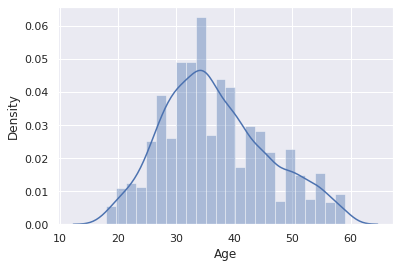

In [1424]:
q = data['Age'].quantile(0.94)
data1 = data[data['Age']<q]
data1.describe(include = 'all')
sns.distplot(data1['Age'])

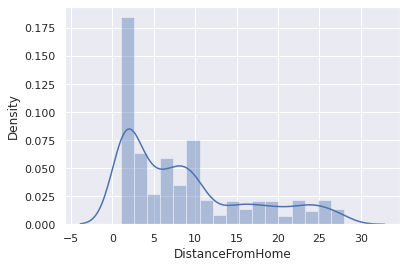

In [1425]:
q = data1['DistanceFromHome'].quantile(0.94)
data2 = data1[data1['DistanceFromHome']<q]
data2.describe(include = 'all')
sns.distplot(data2['DistanceFromHome'])

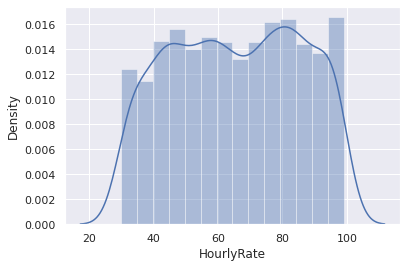

In [1426]:
q = data2['HourlyRate'].quantile(0.9999)
data3 = data2[data2['HourlyRate' ]<q]
data3.describe(include = 'all')
sns.distplot(data3['HourlyRate' ])

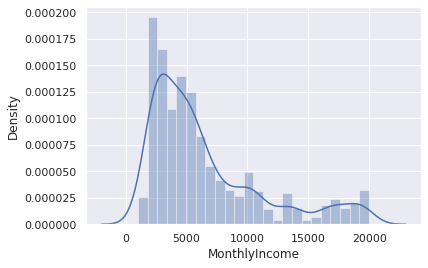

In [1427]:
q = data3['MonthlyIncome'].quantile(0.9999)
data4 = data3[data3['MonthlyIncome']<q]
data4.describe(include = 'all')
sns.distplot(data4['MonthlyIncome'])

In [1428]:
# q = data31['YearsSinceLastPromotion'].quantile(0.93)
# data32 = data31[data31['YearsSinceLastPromotion']<q]
# data32.describe(include = 'all')
# sns.distplot(data32['YearsSinceLastPromotion'])

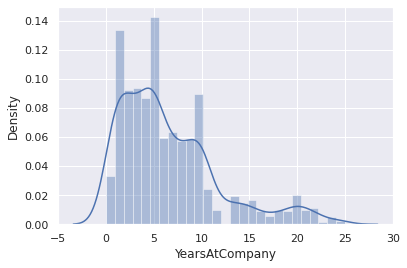

In [1429]:
q = data31['YearsAtCompany'].quantile(0.93)
data4 = data31[data31['YearsAtCompany']<q]
data4.describe(include = 'all')
sns.distplot(data4['YearsAtCompany'])




In [1430]:
# q = data33['YearsInCurrentRole'].quantile(0.92)
# data34 = data33[data33['YearsInCurrentRole']<q]
# sns.distplot(data34['YearsInCurrentRole'])


In [1431]:
# q = data34['YearsWithCurrManager'].quantile(0.925)
# data35 = data34[data34['YearsWithCurrManager']<q]
# sns.distplot(data35['YearsWithCurrManager'])


In [1432]:
# q = data35['TotalWorkingYears'].quantile(0.92)
# data4 = data35[data35['TotalWorkingYears']<q]
# sns.distplot(data4['TotalWorkingYears'])

In [1433]:
xytest = data[data['Attrition']!='Yes']
xytest = xytest[xytest['Attrition']!='No']



In [1434]:
xytest

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,EmployeeNumber
1323,35.0,Travel_Rarely,Research & Development,27.0,1.0,Medical,3.0,Female,53.0,2.0,1.0,Research Scientist,1.0,Single,2559.0,1.0,Y,No,11.0,3.0,4.0,80.0,0.0,6.0,3.0,2.0,6.0,5.0,1.0,1.0,NaN,30708.0,100000
1324,27.0,Travel_Rarely,Research & Development,5.0,3.0,Life Sciences,3.0,Female,85.0,3.0,1.0,Research Scientist,2.0,Single,2478.0,1.0,Y,Yes,12.0,3.0,2.0,80.0,0.0,4.0,2.0,2.0,4.0,3.0,1.0,2.0,NaN,29736.0,100001
1325,24.0,Travel_Rarely,Sales,4.0,1.0,Medical,4.0,Female,42.0,3.0,2.0,Sales Executive,3.0,Married,4162.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,5.0,3.0,3.0,5.0,4.0,0.0,3.0,NaN,49944.0,100002
1326,37.0,Non-Travel,Sales,9.0,4.0,Medical,1.0,Male,69.0,3.0,3.0,Sales Executive,2.0,Divorced,8834.0,1.0,Y,No,13.0,3.0,4.0,80.0,1.0,9.0,6.0,3.0,9.0,5.0,7.0,7.0,NaN,106008.0,100003
1327,33.0,Travel_Rarely,Research & Development,1.0,4.0,Other,4.0,Male,63.0,3.0,1.0,Research Scientist,4.0,Single,2686.0,1.0,Y,Yes,13.0,3.0,3.0,80.0,0.0,10.0,2.0,2.0,10.0,9.0,7.0,8.0,NaN,32232.0,100004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,35.0,Non-Travel,Research & Development,8.0,4.0,Life Sciences,3.0,Female,52.0,3.0,2.0,Healthcare Representative,3.0,Married,4148.0,1.0,Y,No,12.0,3.0,4.0,80.0,1.0,15.0,5.0,3.0,14.0,11.0,2.0,9.0,NaN,49776.0,100142
1466,41.0,Travel_Rarely,Research & Development,28.0,4.0,Life Sciences,1.0,Female,60.0,2.0,4.0,Manufacturing Director,2.0,Married,13570.0,0.0,Y,No,23.0,4.0,3.0,80.0,1.0,21.0,3.0,3.0,20.0,7.0,0.0,10.0,NaN,162840.0,100143
1467,42.0,Travel_Rarely,Research & Development,6.0,3.0,Medical,3.0,Male,83.0,3.0,3.0,Research Director,1.0,Married,13348.0,9.0,Y,No,13.0,3.0,2.0,80.0,1.0,18.0,3.0,4.0,13.0,7.0,5.0,7.0,NaN,160176.0,100144
1468,44.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,NaN,95736.0,100145


In [1435]:
data4=data4.dropna()

In [1436]:
data4

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,EmployeeNumber
0,30.0,Travel_Rarely,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0,104
1,38.0,Travel_Rarely,Research & Development,2.0,2.0,Medical,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0,1638
2,26.0,Travel_Rarely,Research & Development,6.0,3.0,Other,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,1.0,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0,164
3,28.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0,395
4,35.0,Travel_Rarely,Research & Development,4.0,2.0,Other,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,29.0,Travel_Rarely,Sales,2.0,3.0,Medical,1.0,Male,78.0,2.0,2.0,Sales Executive,2.0,Married,6644.0,2.0,Y,No,19.0,3.0,2.0,80.0,2.0,10.0,2.0,3.0,0.0,0.0,0.0,0.0,Yes,79728.0,7957
4428,25.0,Travel_Rarely,Research & Development,1.0,3.0,Medical,4.0,Female,40.0,3.0,1.0,Research Scientist,2.0,Single,2096.0,1.0,Y,No,18.0,3.0,4.0,80.0,0.0,2.0,3.0,2.0,2.0,2.0,2778.0,1.0,Yes,25152.0,7959
4435,35.0,Non-Travel,Research & Development,8.0,4.0,Life Sciences,3.0,Female,52.0,3.0,2.0,Healthcare Representative,3.0,Married,4148.0,1.0,Y,No,12.0,3.0,4.0,80.0,1.0,15.0,5.0,3.0,14.0,6755.0,2.0,9.0,Yes,49776.0,7966
4438,41.0,Travel_Rarely,Research & Development,28.0,4.0,Life Sciences,1.0,Female,60.0,2.0,4.0,Manufacturing Director,2.0,Married,13570.0,0.0,Y,No,23.0,4.0,3.0,80.0,1.0,21.0,3.0,3.0,20.0,3797.0,0.0,10.0,Yes,162840.0,7969


In [1437]:
data4.isnull().sum(axis = 0)
data4.reset_index(drop=True)
xytest.reset_index(drop=True)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,EmployeeNumber
0,35.0,Travel_Rarely,Research & Development,27.0,1.0,Medical,3.0,Female,53.0,2.0,1.0,Research Scientist,1.0,Single,2559.0,1.0,Y,No,11.0,3.0,4.0,80.0,0.0,6.0,3.0,2.0,6.0,5.0,1.0,1.0,NaN,30708.0,100000
1,27.0,Travel_Rarely,Research & Development,5.0,3.0,Life Sciences,3.0,Female,85.0,3.0,1.0,Research Scientist,2.0,Single,2478.0,1.0,Y,Yes,12.0,3.0,2.0,80.0,0.0,4.0,2.0,2.0,4.0,3.0,1.0,2.0,NaN,29736.0,100001
2,24.0,Travel_Rarely,Sales,4.0,1.0,Medical,4.0,Female,42.0,3.0,2.0,Sales Executive,3.0,Married,4162.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,5.0,3.0,3.0,5.0,4.0,0.0,3.0,NaN,49944.0,100002
3,37.0,Non-Travel,Sales,9.0,4.0,Medical,1.0,Male,69.0,3.0,3.0,Sales Executive,2.0,Divorced,8834.0,1.0,Y,No,13.0,3.0,4.0,80.0,1.0,9.0,6.0,3.0,9.0,5.0,7.0,7.0,NaN,106008.0,100003
4,33.0,Travel_Rarely,Research & Development,1.0,4.0,Other,4.0,Male,63.0,3.0,1.0,Research Scientist,4.0,Single,2686.0,1.0,Y,Yes,13.0,3.0,3.0,80.0,0.0,10.0,2.0,2.0,10.0,9.0,7.0,8.0,NaN,32232.0,100004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,35.0,Non-Travel,Research & Development,8.0,4.0,Life Sciences,3.0,Female,52.0,3.0,2.0,Healthcare Representative,3.0,Married,4148.0,1.0,Y,No,12.0,3.0,4.0,80.0,1.0,15.0,5.0,3.0,14.0,11.0,2.0,9.0,NaN,49776.0,100142
143,41.0,Travel_Rarely,Research & Development,28.0,4.0,Life Sciences,1.0,Female,60.0,2.0,4.0,Manufacturing Director,2.0,Married,13570.0,0.0,Y,No,23.0,4.0,3.0,80.0,1.0,21.0,3.0,3.0,20.0,7.0,0.0,10.0,NaN,162840.0,100143
144,42.0,Travel_Rarely,Research & Development,6.0,3.0,Medical,3.0,Male,83.0,3.0,3.0,Research Director,1.0,Married,13348.0,9.0,Y,No,13.0,3.0,2.0,80.0,1.0,18.0,3.0,4.0,13.0,7.0,5.0,7.0,NaN,160176.0,100144
145,44.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,NaN,95736.0,100145


In [1438]:
data4.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome,EmployeeNumber
count,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.0,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000
mean,36.533467,8.787712,2.889111,2.742258,65.861638,2.749750,2.017982,2.730769,6278.028971,2.674326,15.185315,3.146354,2.697802,80.0,0.804196,404.775724,2.793207,2.753247,6.581419,398.875624,410.585914,368.596404,75336.347652,3073.253746
std,8.996869,7.631924,1.029641,1.086238,20.000183,0.711027,1.067758,1.101515,4495.949952,2.502938,3.622232,0.353549,1.085125,0.0,0.854551,1611.743966,1.299750,0.701289,5.296092,1538.149451,1613.928364,1489.624807,53951.399419,2738.724113
min,18.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12108.000000,1.000000
25%,30.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2897.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,34764.000000,826.250000
50%,35.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4855.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,58260.000000,1661.500000
75%,42.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,7756.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,17.000000,3.000000,3.000000,9.000000,7.000000,4.000000,7.000000,93072.000000,5948.750000
max,59.000000,28.000000,5.000000,4.000000,99.000000,4.000000,5.000000,4.000000,19973.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,9939.000000,6.000000,4.000000,25.000000,9937.000000,9990.000000,9882.000000,239676.000000,7971.000000


In [1439]:
data4.head(100)


,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,EmployeeNumber
0,30.0,Travel_Rarely,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0,104
1,38.0,Travel_Rarely,Research & Development,2.0,2.0,Medical,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0,1638
2,26.0,Travel_Rarely,Research & Development,6.0,3.0,Other,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,1.0,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0,164
3,28.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0,395
4,35.0,Travel_Rarely,Research & Development,4.0,2.0,Other,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,28.0,Travel_Rarely,Sales,10.0,1.0,Medical,4.0,Male,74.0,3.0,1.0,Sales Representative,2.0,Married,1052.0,1.0,Y,No,22.0,4.0,2.0,80.0,0.0,1.0,5.0,3.0,1.0,0.0,0.0,0.0,No,12624.0,1056
102,29.0,Travel_Frequently,Sales,2.0,2.0,Life Sciences,2.0,Male,44.0,3.0,2.0,Sales Executive,4.0,Single,4554.0,1.0,Y,No,18.0,3.0,1.0,80.0,0.0,10.0,3.0,2.0,10.0,7.0,0.0,9.0,No,54648.0,388
103,36.0,Travel_Rarely,Sales,2.0,4.0,Life Sciences,3.0,Male,70.0,3.0,1.0,Sales Representative,4.0,Single,2644.0,3.0,Y,Yes,21.0,4.0,4.0,80.0,0.0,7.0,3.0,2.0,3.0,2.0,1.0,2.0,No,31728.0,1556
104,30.0,Travel_Rarely,Research & Development,18.0,3.0,Life Sciences,1.0,Female,75.0,3.0,1.0,Research Scientist,3.0,Single,2632.0,1.0,Y,No,14.0,3.0,3.0,80.0,0.0,5.0,4.0,2.0,5.0,4.0,0.0,4.0,No,31584.0,194


In [1440]:
data4.YearsWithCurrManager.unique()

array([0.000e+00, 2.000e+00, 3.000e+00, 7.000e+00, 8.000e+00, 9.000e+00,
       6.000e+00, 1.100e+01, 4.000e+00, 1.200e+01, 5.000e+00, 1.000e+01,
       1.700e+01, 1.000e+00, 1.300e+01, 1.400e+01, 1.600e+01, 1.500e+01,
       1.798e+03, 9.404e+03, 4.163e+03, 2.411e+03, 1.947e+03, 5.987e+03,
       5.346e+03, 2.106e+03, 8.731e+03, 1.759e+03, 2.736e+03, 2.181e+03,
       7.012e+03, 6.277e+03, 7.405e+03, 2.101e+03, 3.908e+03, 1.781e+03,
       2.883e+03, 4.389e+03, 7.032e+03, 2.811e+03, 5.256e+03, 6.162e+03,
       5.242e+03, 3.922e+03, 5.168e+03, 8.672e+03, 9.717e+03, 6.129e+03,
       5.048e+03, 3.434e+03, 2.879e+03, 9.333e+03, 2.892e+03, 4.528e+03,
       7.876e+03, 2.702e+03, 6.788e+03, 1.077e+03, 2.428e+03, 5.233e+03,
       8.457e+03, 9.709e+03, 3.546e+03, 9.321e+03, 5.326e+03, 2.333e+03,
       9.882e+03, 2.564e+03, 1.910e+03, 4.869e+03, 2.480e+03, 8.393e+03,
       4.404e+03, 6.426e+03, 8.841e+03, 7.091e+03, 4.220e+03, 1.540e+03,
       6.691e+03, 7.781e+03, 4.321e+03, 2.220e+03, 

In [1441]:
data4


,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,EmployeeNumber
0,30.0,Travel_Rarely,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0,104
1,38.0,Travel_Rarely,Research & Development,2.0,2.0,Medical,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0,1638
2,26.0,Travel_Rarely,Research & Development,6.0,3.0,Other,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,1.0,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0,164
3,28.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0,395
4,35.0,Travel_Rarely,Research & Development,4.0,2.0,Other,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,29.0,Travel_Rarely,Sales,2.0,3.0,Medical,1.0,Male,78.0,2.0,2.0,Sales Executive,2.0,Married,6644.0,2.0,Y,No,19.0,3.0,2.0,80.0,2.0,10.0,2.0,3.0,0.0,0.0,0.0,0.0,Yes,79728.0,7957
4428,25.0,Travel_Rarely,Research & Development,1.0,3.0,Medical,4.0,Female,40.0,3.0,1.0,Research Scientist,2.0,Single,2096.0,1.0,Y,No,18.0,3.0,4.0,80.0,0.0,2.0,3.0,2.0,2.0,2.0,2778.0,1.0,Yes,25152.0,7959
4435,35.0,Non-Travel,Research & Development,8.0,4.0,Life Sciences,3.0,Female,52.0,3.0,2.0,Healthcare Representative,3.0,Married,4148.0,1.0,Y,No,12.0,3.0,4.0,80.0,1.0,15.0,5.0,3.0,14.0,6755.0,2.0,9.0,Yes,49776.0,7966
4438,41.0,Travel_Rarely,Research & Development,28.0,4.0,Life Sciences,1.0,Female,60.0,2.0,4.0,Manufacturing Director,2.0,Married,13570.0,0.0,Y,No,23.0,4.0,3.0,80.0,1.0,21.0,3.0,3.0,20.0,3797.0,0.0,10.0,Yes,162840.0,7969


In [1442]:
YN_mapping = {"Yes": 1, "No": 0}

In [1443]:
data4.iloc[:,-3] = data4.iloc[:,-3].map(YN_mapping)

In [1444]:
data4.iloc[:,17]

0       Yes
1       Yes
2        No
3        No
4        No
       ... 
4426     No
4428     No
4435     No
4438     No
4440     No
Name: OverTime, Length: 2002, dtype: object

In [1445]:
data4.iloc[:,17] = data4.iloc[:,17].map(YN_mapping)
xytest.iloc[:,17] = xytest.iloc[:,17].map(YN_mapping)

In [1446]:
data4 = data4.drop(['HourlyRate',  'Over18', 'YearlyIncome','TotalWorkingYears', 'StandardHours', 'YearlyIncome','EmployeeNumber'], axis=1)
xytest = xytest.drop(['HourlyRate',  'Over18',  'YearlyIncome','TotalWorkingYears', 'StandardHours', 'YearlyIncome','EmployeeNumber'], axis=1)


In [1447]:
data4.describe()


,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000
mean,36.533467,8.787712,2.889111,2.742258,2.749750,2.017982,2.730769,6278.028971,2.674326,0.286214,15.185315,3.146354,2.697802,0.804196,2.793207,2.753247,6.581419,398.875624,410.585914,368.596404,0.377123
std,8.996869,7.631924,1.029641,1.086238,0.711027,1.067758,1.101515,4495.949952,2.502938,0.452103,3.622232,0.353549,1.085125,0.854551,1.299750,0.701289,5.296092,1538.149451,1613.928364,1489.624807,0.484787
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2897.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,35.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4855.000000,2.000000,0.000000,14.000000,3.000000,3.000000,1.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,42.000000,13.000000,4.000000,4.000000,3.000000,3.000000,4.000000,7756.000000,4.000000,1.000000,18.000000,3.000000,4.000000,1.000000,3.000000,3.000000,9.000000,7.000000,4.000000,7.000000,1.000000
max,59.000000,28.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19973.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,6.000000,4.000000,25.000000,9937.000000,9990.000000,9882.000000,1.000000


In [1448]:
# data4 = data4.drop(['BusinessTravel', 'EducationField', 'EnvironmentSatisfaction', 'MaritalStatus', 'Over18','PercentSalaryHike','RelationshipSatisfaction','StandardHours','StockOptionLevel' ,'YearsInCurrentRole', 'YearsWithCurrManager', 'YearlyIncome', 'JobLevel','JobInvolvement'], axis=1)

In [1449]:
# xytest = xytest.drop(['BusinessTravel', 'EducationField', 'EnvironmentSatisfaction', 'MaritalStatus', 'Over18','PercentSalaryHike','RelationshipSatisfaction','StandardHours','StockOptionLevel' ,'YearsInCurrentRole', 'YearsWithCurrManager', 'YearlyIncome', 'JobLevel','JobInvolvement'], axis=1)

In [1450]:
xytest

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1323,35.0,Travel_Rarely,Research & Development,27.0,1.0,Medical,3.0,Female,2.0,1.0,Research Scientist,1.0,Single,2559.0,1.0,0,11.0,3.0,4.0,0.0,3.0,2.0,6.0,5.0,1.0,1.0,NaN
1324,27.0,Travel_Rarely,Research & Development,5.0,3.0,Life Sciences,3.0,Female,3.0,1.0,Research Scientist,2.0,Single,2478.0,1.0,1,12.0,3.0,2.0,0.0,2.0,2.0,4.0,3.0,1.0,2.0,NaN
1325,24.0,Travel_Rarely,Sales,4.0,1.0,Medical,4.0,Female,3.0,2.0,Sales Executive,3.0,Married,4162.0,1.0,1,12.0,3.0,3.0,2.0,3.0,3.0,5.0,4.0,0.0,3.0,NaN
1326,37.0,Non-Travel,Sales,9.0,4.0,Medical,1.0,Male,3.0,3.0,Sales Executive,2.0,Divorced,8834.0,1.0,0,13.0,3.0,4.0,1.0,6.0,3.0,9.0,5.0,7.0,7.0,NaN
1327,33.0,Travel_Rarely,Research & Development,1.0,4.0,Other,4.0,Male,3.0,1.0,Research Scientist,4.0,Single,2686.0,1.0,1,13.0,3.0,3.0,0.0,2.0,2.0,10.0,9.0,7.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,35.0,Non-Travel,Research & Development,8.0,4.0,Life Sciences,3.0,Female,3.0,2.0,Healthcare Representative,3.0,Married,4148.0,1.0,0,12.0,3.0,4.0,1.0,5.0,3.0,14.0,11.0,2.0,9.0,NaN
1466,41.0,Travel_Rarely,Research & Development,28.0,4.0,Life Sciences,1.0,Female,2.0,4.0,Manufacturing Director,2.0,Married,13570.0,0.0,0,23.0,4.0,3.0,1.0,3.0,3.0,20.0,7.0,0.0,10.0,NaN
1467,42.0,Travel_Rarely,Research & Development,6.0,3.0,Medical,3.0,Male,3.0,3.0,Research Director,1.0,Married,13348.0,9.0,0,13.0,3.0,2.0,1.0,3.0,4.0,13.0,7.0,5.0,7.0,NaN
1468,44.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,0,11.0,3.0,4.0,1.0,2.0,3.0,10.0,7.0,0.0,5.0,NaN


In [1451]:
testx=xytest.iloc[:,:-1]
testx

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1323,35.0,Travel_Rarely,Research & Development,27.0,1.0,Medical,3.0,Female,2.0,1.0,Research Scientist,1.0,Single,2559.0,1.0,0,11.0,3.0,4.0,0.0,3.0,2.0,6.0,5.0,1.0,1.0
1324,27.0,Travel_Rarely,Research & Development,5.0,3.0,Life Sciences,3.0,Female,3.0,1.0,Research Scientist,2.0,Single,2478.0,1.0,1,12.0,3.0,2.0,0.0,2.0,2.0,4.0,3.0,1.0,2.0
1325,24.0,Travel_Rarely,Sales,4.0,1.0,Medical,4.0,Female,3.0,2.0,Sales Executive,3.0,Married,4162.0,1.0,1,12.0,3.0,3.0,2.0,3.0,3.0,5.0,4.0,0.0,3.0
1326,37.0,Non-Travel,Sales,9.0,4.0,Medical,1.0,Male,3.0,3.0,Sales Executive,2.0,Divorced,8834.0,1.0,0,13.0,3.0,4.0,1.0,6.0,3.0,9.0,5.0,7.0,7.0
1327,33.0,Travel_Rarely,Research & Development,1.0,4.0,Other,4.0,Male,3.0,1.0,Research Scientist,4.0,Single,2686.0,1.0,1,13.0,3.0,3.0,0.0,2.0,2.0,10.0,9.0,7.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,35.0,Non-Travel,Research & Development,8.0,4.0,Life Sciences,3.0,Female,3.0,2.0,Healthcare Representative,3.0,Married,4148.0,1.0,0,12.0,3.0,4.0,1.0,5.0,3.0,14.0,11.0,2.0,9.0
1466,41.0,Travel_Rarely,Research & Development,28.0,4.0,Life Sciences,1.0,Female,2.0,4.0,Manufacturing Director,2.0,Married,13570.0,0.0,0,23.0,4.0,3.0,1.0,3.0,3.0,20.0,7.0,0.0,10.0
1467,42.0,Travel_Rarely,Research & Development,6.0,3.0,Medical,3.0,Male,3.0,3.0,Research Director,1.0,Married,13348.0,9.0,0,13.0,3.0,2.0,1.0,3.0,4.0,13.0,7.0,5.0,7.0
1468,44.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,0,11.0,3.0,4.0,1.0,2.0,3.0,10.0,7.0,0.0,5.0


In [1452]:
#i nie skaluję
# forscaling = data42.loc[:,['Age','DistanceFromHome', 'MonthlyIncome']]
# forscaling2 = testx.loc[:,['Age','DistanceFromHome',  'MonthlyIncome']]


Wizualizacje i choosing features

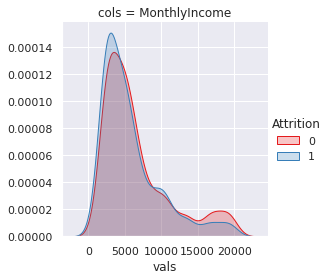

In [1453]:
Age_YAC_NCW = data4[[ 'MonthlyIncome','Attrition']]
Age_YAC_NCW.head()
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
AYN_melt.head()
g = sns.FacetGrid(AYN_melt, col='cols', hue="Attrition", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())
#Focus on the red area--distribution of Attrition
#Lots of attrition among the 'young' employees (for Age or for YearsAtCompany)-- not surprising -- trial to find a suit -- company culture.. 
#Those who have worked in more than 5 companies tend to attrit. -- The average time spent in every company is shorter -- HR insight..

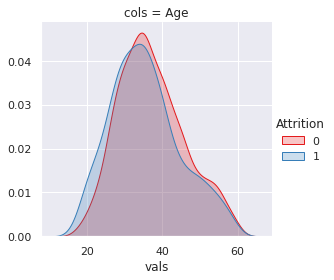

In [1454]:
Age_YAC_NCW = data4[['Age','Attrition']]
Age_YAC_NCW.head()
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
AYN_melt.head()
g = sns.FacetGrid(AYN_melt, col='cols', hue="Attrition", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())
#Focus on the red area--distribution of Attrition
#Lots of attrition among the 'young' employees (for Age or for YearsAtCompany)-- not surprising -- trial to find a suit -- company culture.. 
#Those who have worked in more than 5 companies tend to attrit. -- The average time spent in every company is shorter -- HR insight..

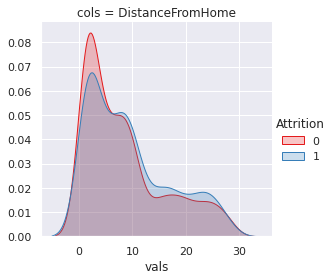

In [1455]:
Age_YAC_NCW = data4[['DistanceFromHome','Attrition']]
Age_YAC_NCW.head()
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
AYN_melt.head()
g = sns.FacetGrid(AYN_melt, col='cols', hue="Attrition", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())
#Focus on the red area--distribution of Attrition
#Lots of attrition among the 'young' employees (for Age or for YearsAtCompany)-- not surprising -- trial to find a suit -- company culture.. 
#Those who have worked in more than 5 companies tend to attrit. -- The average time spent in every company is shorter -- HR insight..

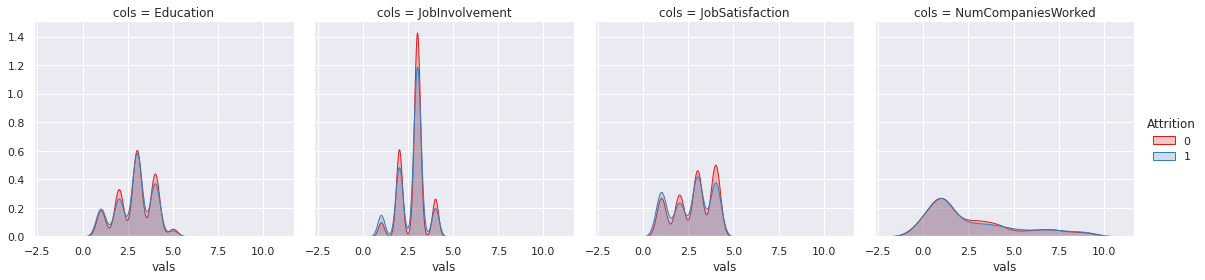

In [1456]:
Age_YAC_NCW = data4[[ 'Education', 'JobInvolvement','JobSatisfaction', 'NumCompaniesWorked', 'Attrition']]
Age_YAC_NCW.head()
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
AYN_melt.head()
g = sns.FacetGrid(AYN_melt, col='cols', hue="Attrition", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())


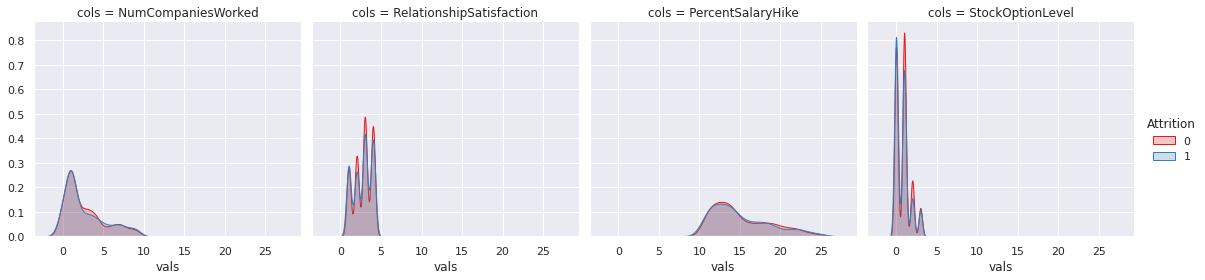

In [1457]:
Age_YAC_NCW = data4[[ 'NumCompaniesWorked', 'RelationshipSatisfaction','PercentSalaryHike', 'StockOptionLevel', 'Attrition']]
Age_YAC_NCW.head()
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
AYN_melt.head()
g = sns.FacetGrid(AYN_melt, col='cols', hue="Attrition", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())
#NumCompaniesWorked	PercentSalaryHike	PerformanceRating	RelationshipSatisfaction	
#StandardHours	StockOptionLevel	TotalWorkingYears	TrainingTimesLastYear	WorkLifeBalance	YearsAtCompany	
#YearsInCurrentRole	YearsSinceLastPromotion	YearsWithCurrManager

In [1458]:
Age_YAC_NCW = data4[[ 'TotalWorkingYears', 'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'Attrition']]
Age_YAC_NCW.head()
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
AYN_melt.head()
g = sns.FacetGrid(AYN_melt, col='cols', hue="Attrition", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())
#NumCompaniesWorked	PercentSalaryHike	PerformanceRating	RelationshipSatisfaction	
#StandardHours	StockOptionLevel	TotalWorkingYears	TrainingTimesLastYear	WorkLifeBalance	YearsAtCompany	
#YearsInCurrentRole	YearsSinceLastPromotion	YearsWithCurrManager

KeyError: ignored

In [ ]:
Age_YAC_NCW = data4[[ 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager', 'YearsAtCompany', 'Attrition']]
Age_YAC_NCW.head()
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
AYN_melt.head()
g = sns.FacetGrid(AYN_melt, col='cols', hue="Attrition", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())
#NumCompaniesWorked	PercentSalaryHike	PerformanceRating	RelationshipSatisfaction	
#StandardHours	StockOptionLevel	TotalWorkingYears	TrainingTimesLastYear	WorkLifeBalance	YearsAtCompany	
#YearsInCurrentRole	YearsSinceLastPromotion	YearsWithCurrManager

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(x="JobSatisfaction", y="MonthlyIncome", hue="Attrition",
            data=data4, palette="Set1")

In [ ]:
# Data
r = [0,1]
Y_F = len(data4[(data4['Attrition'] == 1) & (data4['Gender'] == 'Female')])
N_F = len(data4[(data4['Attrition'] == 0) & (data4['Gender'] == 'Female')])
Y_M = len(data4[(data4['Attrition'] == 1) & (data4['Gender'] == 'Male')])
N_M = len(data4[(data4['Attrition'] == 0) & (data4['Gender'] == 'Male')])
raw_data = {'greenBars': [Y_F, Y_M], 'orangeBars': [N_F, N_M]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
 
# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('Female','Male')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("Gender")
 
# Show graphic
plt.show()

In [ ]:
# Data
r = [0,1,2,3,4,5,6,7,8]
Y_F = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Healthcare Representative')])
N_F = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Healthcare Representative')])
Y_M = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Human Resources')])
N_M = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Human Resources')])
Y_C = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Laboratory Technician')])
N_C = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Laboratory Technician')])
Y_D = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Manager')])
N_D = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Manager')])
Y_E = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Manufacturing Director')])
N_E = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Manufacturing Director')])
Y_F = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Research Director')])
N_F = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Research Director')])
Y_G = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Research Scientist')])
N_G = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Research Scientist')])
Y_H = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Sales Executive')])
N_H = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Sales Executive')])
Y_I = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Sales Representative')])
N_I = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Sales Representative')])

raw_data = {'greenBars': [Y_F, Y_M,Y_C,Y_D,Y_E,Y_F,Y_G,Y_H,Y_I], 'orangeBars': [N_F, N_M,N_C,N_D,N_E,N_F,N_G,N_H,N_I]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
 
# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('Heal','HR','LabTe','Man','ManDir','RDir', 'RSc', 'SalesEx', 'SalRepr' )
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel('JobRole')
 
# Show graphic
plt.show()

In [ ]:
# Data
r = [0,1,2]
Y_F = len(data4[(data4['Attrition'] == 1) & (data4['MaritalStatus'] == 'Divorced')])
N_F = len(data4[(data4['Attrition'] == 0) & (data4['MaritalStatus'] == 'Divorced')])
Y_M = len(data4[(data4['Attrition'] == 1) & (data4['MaritalStatus'] == 'Married')])
N_M = len(data4[(data4['Attrition'] == 0) & (data4['MaritalStatus'] == 'Married')])
Y_C = len(data4[(data4['Attrition'] == 1) & (data4['MaritalStatus'] == 'Single')])
N_C = len(data4[(data4['Attrition'] == 0) & (data4['MaritalStatus'] == 'Single')])

raw_data = {'greenBars': [Y_F, Y_M,Y_C], 'orangeBars': [N_F, N_M,N_C]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
 
# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('Divorced','Married','Single')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel('Martialst')
 
# Show graphic
plt.show()

In [ ]:
# Data
r = [0,1,2,3,4]
Y_F = len(data4[(data4['Attrition'] == 1) & (data4['EducationField'] == 'Life Sciences')])
N_F = len(data4[(data4['Attrition'] == 0) & (data4['EducationField'] == 'Life Sciences')])
Y_M = len(data4[(data4['Attrition'] == 1) & (data4['EducationField'] == 'Marketing')])
N_M = len(data4[(data4['Attrition'] == 0) & (data4['EducationField'] == 'Marketing')])
Y_C = len(data4[(data4['Attrition'] == 1) & (data4['EducationField'] == 'Medical')])
N_C = len(data4[(data4['Attrition'] == 0) & (data4['EducationField'] == 'Medical')])
Y_D = len(data4[(data4['Attrition'] == 1) & (data4['EducationField'] == 'Other')])
N_D = len(data4[(data4['Attrition'] == 0) & (data4['EducationField'] == 'Other')])
Y_E = len(data4[(data4['Attrition'] == 1) & (data4['EducationField'] == 'Technical Degree')])
N_E = len(data4[(data4['Attrition'] == 0) & (data4['EducationField'] == 'Technical Degree')])

raw_data = {'greenBars': [Y_F, Y_M,Y_C,Y_D,Y_E], 'orangeBars': [N_F, N_M,N_C,N_D,N_E]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
 
# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('Life Sc','Marketing','Medical','Other','Techn' )
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel('EducationField')
 
# Show graphic
plt.show()

In [ ]:
# Data
r = [0,1,2]
Y_F = len(data4[(data4['Attrition'] == 1) & (data4['BusinessTravel'] == 'Travel_Rarely')])
N_F = len(data4[(data4['Attrition'] == 0) & (data4['BusinessTravel'] == 'Travel_Rarely')])
Y_M = len(data4[(data4['Attrition'] == 1) & (data4['BusinessTravel'] == 'Travel_Frequently')])
N_M = len(data4[(data4['Attrition'] == 0) & (data4['BusinessTravel'] == 'Travel_Frequently')])
Y_C = len(data4[(data4['Attrition'] == 1) & (data4['BusinessTravel'] == 'Non-Travel')])
N_C = len(data4[(data4['Attrition'] == 0) & (data4['BusinessTravel'] == 'Non-Travel')])

raw_data = {'greenBars': [Y_F, Y_M,Y_C], 'orangeBars': [N_F, N_M,N_C]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
 
# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('Travel_Rarely','Travel_Frequently','Non-Travel')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel('BusinessTravel')
 
# Show graphic
plt.show()

In [ ]:
# nonscaled = data4.loc[:,[ 'Education', 'EducationField', 'JobInvolvement',  'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked']]
# nonscaled2 = testx.loc[:,[ 'Education', 'EducationField', 'JobInvolvement',  'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked']]
# #gender wywalony po comparison, to samo business travel
#narazie nic nie wywalam

In [1459]:
data4

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,30.0,Travel_Rarely,Research & Development,1.0,1.0,Life Sciences,4.0,Male,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,1.0,1,12.0,3.0,3.0,2.0,1.0,2.0,10.0,8.0,3.0,0.0,0
1,38.0,Travel_Rarely,Research & Development,2.0,2.0,Medical,4.0,Female,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,3.0,1,19.0,3.0,4.0,1.0,6.0,4.0,5.0,4.0,0.0,2.0,0
2,26.0,Travel_Rarely,Research & Development,6.0,3.0,Other,3.0,Female,2.0,1.0,Research Scientist,2.0,Married,2368.0,1.0,0,19.0,3.0,3.0,0.0,3.0,2.0,5.0,4.0,4.0,3.0,0
3,28.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,4.0,Female,3.0,1.0,Research Scientist,4.0,Single,3310.0,1.0,0,21.0,4.0,4.0,0.0,3.0,3.0,5.0,3.0,0.0,2.0,0
4,35.0,Travel_Rarely,Research & Development,4.0,2.0,Other,3.0,Male,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,1.0,0,12.0,3.0,3.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,29.0,Travel_Rarely,Sales,2.0,3.0,Medical,1.0,Male,2.0,2.0,Sales Executive,2.0,Married,6644.0,2.0,0,19.0,3.0,2.0,2.0,2.0,3.0,0.0,0.0,0.0,0.0,1
4428,25.0,Travel_Rarely,Research & Development,1.0,3.0,Medical,4.0,Female,3.0,1.0,Research Scientist,2.0,Single,2096.0,1.0,0,18.0,3.0,4.0,0.0,3.0,2.0,2.0,2.0,2778.0,1.0,1
4435,35.0,Non-Travel,Research & Development,8.0,4.0,Life Sciences,3.0,Female,3.0,2.0,Healthcare Representative,3.0,Married,4148.0,1.0,0,12.0,3.0,4.0,1.0,5.0,3.0,14.0,6755.0,2.0,9.0,1
4438,41.0,Travel_Rarely,Research & Development,28.0,4.0,Life Sciences,1.0,Female,2.0,4.0,Manufacturing Director,2.0,Married,13570.0,0.0,0,23.0,4.0,3.0,1.0,3.0,3.0,20.0,3797.0,0.0,10.0,1


In [1460]:
y = data4.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
4426    1
4428    1
4435    1
4438    1
4440    1
Name: Attrition, Length: 2002, dtype: int64

In [1462]:
x = data4.iloc[:,:-1]

In [1463]:
x

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,30.0,Travel_Rarely,Research & Development,1.0,1.0,Life Sciences,4.0,Male,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,1.0,1,12.0,3.0,3.0,2.0,1.0,2.0,10.0,8.0,3.0,0.0
1,38.0,Travel_Rarely,Research & Development,2.0,2.0,Medical,4.0,Female,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,3.0,1,19.0,3.0,4.0,1.0,6.0,4.0,5.0,4.0,0.0,2.0
2,26.0,Travel_Rarely,Research & Development,6.0,3.0,Other,3.0,Female,2.0,1.0,Research Scientist,2.0,Married,2368.0,1.0,0,19.0,3.0,3.0,0.0,3.0,2.0,5.0,4.0,4.0,3.0
3,28.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,4.0,Female,3.0,1.0,Research Scientist,4.0,Single,3310.0,1.0,0,21.0,4.0,4.0,0.0,3.0,3.0,5.0,3.0,0.0,2.0
4,35.0,Travel_Rarely,Research & Development,4.0,2.0,Other,3.0,Male,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,1.0,0,12.0,3.0,3.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,29.0,Travel_Rarely,Sales,2.0,3.0,Medical,1.0,Male,2.0,2.0,Sales Executive,2.0,Married,6644.0,2.0,0,19.0,3.0,2.0,2.0,2.0,3.0,0.0,0.0,0.0,0.0
4428,25.0,Travel_Rarely,Research & Development,1.0,3.0,Medical,4.0,Female,3.0,1.0,Research Scientist,2.0,Single,2096.0,1.0,0,18.0,3.0,4.0,0.0,3.0,2.0,2.0,2.0,2778.0,1.0
4435,35.0,Non-Travel,Research & Development,8.0,4.0,Life Sciences,3.0,Female,3.0,2.0,Healthcare Representative,3.0,Married,4148.0,1.0,0,12.0,3.0,4.0,1.0,5.0,3.0,14.0,6755.0,2.0,9.0
4438,41.0,Travel_Rarely,Research & Development,28.0,4.0,Life Sciences,1.0,Female,2.0,4.0,Manufacturing Director,2.0,Married,13570.0,0.0,0,23.0,4.0,3.0,1.0,3.0,3.0,20.0,3797.0,0.0,10.0


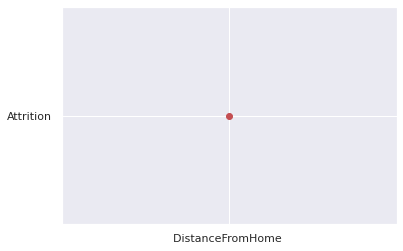

In [1464]:

import matplotlib.pyplot as plt
%matplotlib inline 
plt.scatter('DistanceFromHome ','Attrition', color='r')

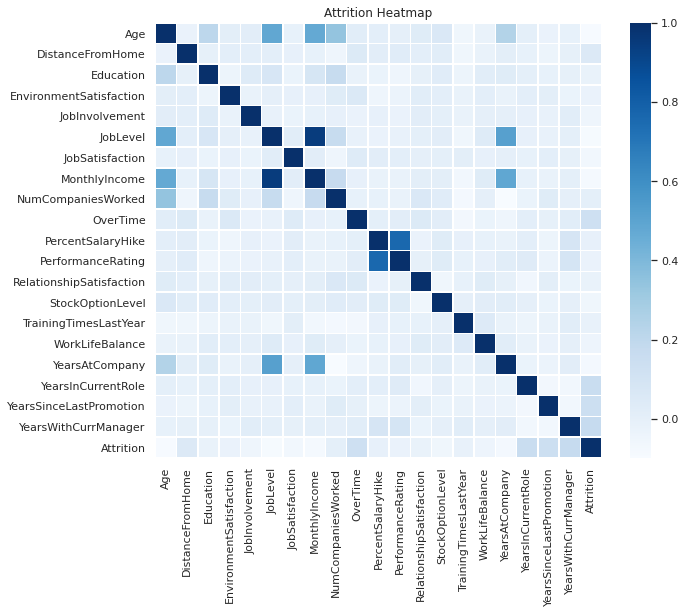

In [1465]:
plt.subplots(figsize=(10,8))
ax = plt.axes()
ax.set_title("Attrition Heatmap")
corr = data4.corr()
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values, cmap="Blues",linewidths=.5)

In [1466]:
testx2=testx

In [1467]:
testx2

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1323,35.0,Travel_Rarely,Research & Development,27.0,1.0,Medical,3.0,Female,2.0,1.0,Research Scientist,1.0,Single,2559.0,1.0,0,11.0,3.0,4.0,0.0,3.0,2.0,6.0,5.0,1.0,1.0
1324,27.0,Travel_Rarely,Research & Development,5.0,3.0,Life Sciences,3.0,Female,3.0,1.0,Research Scientist,2.0,Single,2478.0,1.0,1,12.0,3.0,2.0,0.0,2.0,2.0,4.0,3.0,1.0,2.0
1325,24.0,Travel_Rarely,Sales,4.0,1.0,Medical,4.0,Female,3.0,2.0,Sales Executive,3.0,Married,4162.0,1.0,1,12.0,3.0,3.0,2.0,3.0,3.0,5.0,4.0,0.0,3.0
1326,37.0,Non-Travel,Sales,9.0,4.0,Medical,1.0,Male,3.0,3.0,Sales Executive,2.0,Divorced,8834.0,1.0,0,13.0,3.0,4.0,1.0,6.0,3.0,9.0,5.0,7.0,7.0
1327,33.0,Travel_Rarely,Research & Development,1.0,4.0,Other,4.0,Male,3.0,1.0,Research Scientist,4.0,Single,2686.0,1.0,1,13.0,3.0,3.0,0.0,2.0,2.0,10.0,9.0,7.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,35.0,Non-Travel,Research & Development,8.0,4.0,Life Sciences,3.0,Female,3.0,2.0,Healthcare Representative,3.0,Married,4148.0,1.0,0,12.0,3.0,4.0,1.0,5.0,3.0,14.0,11.0,2.0,9.0
1466,41.0,Travel_Rarely,Research & Development,28.0,4.0,Life Sciences,1.0,Female,2.0,4.0,Manufacturing Director,2.0,Married,13570.0,0.0,0,23.0,4.0,3.0,1.0,3.0,3.0,20.0,7.0,0.0,10.0
1467,42.0,Travel_Rarely,Research & Development,6.0,3.0,Medical,3.0,Male,3.0,3.0,Research Director,1.0,Married,13348.0,9.0,0,13.0,3.0,2.0,1.0,3.0,4.0,13.0,7.0,5.0,7.0
1468,44.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,0,11.0,3.0,4.0,1.0,2.0,3.0,10.0,7.0,0.0,5.0


In [1468]:
# x2 = x
# x = x2.drop(['YearsAtCompany', 'YearsSinceLastPromotion','TotalWorkingYears'], axis=1)
# testx2=testx
# testx = testx2.drop(['YearsAtCompany', 'YearsSinceLastPromotion','TotalWorkingYears'], axis=1)

In [1469]:
from sklearn.preprocessing import MinMaxScaler
# Create an object scaler
MMS = StandardScaler()


In [1470]:
x = pd.get_dummies (x)
xtest = pd.get_dummies (testx)

In [1471]:
datascaled = x
datascaledtest=x

In [1472]:
x.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
count,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000
mean,36.533467,8.787712,2.889111,2.742258,2.749750,2.017982,2.730769,6278.028971,2.674326,0.286214,15.185315,3.146354,2.697802,0.804196,2.793207,2.753247,6.581419,398.875624,410.585914,368.596404,0.096903,0.183317,0.719780,0.040959,0.650849,0.308192,0.016484,0.418082,0.111389,0.313187,0.057942,0.082917,0.405594,0.594406,0.086913,0.036963,0.171828,0.055944,0.097902,0.052448,0.211289,0.229271,0.057443,0.219780,0.469031,0.311189
std,8.996869,7.631924,1.029641,1.086238,0.711027,1.067758,1.101515,4495.949952,2.502938,0.452103,3.622232,0.353549,1.085125,0.854551,1.299750,0.701289,5.296092,1538.149451,1613.928364,1489.624807,0.295900,0.387023,0.449219,0.198245,0.476821,0.461862,0.127357,0.493367,0.314691,0.463906,0.233692,0.275826,0.491129,0.491129,0.281778,0.188718,0.377325,0.229871,0.297256,0.222984,0.408325,0.420469,0.232744,0.414201,0.499165,0.463096
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2897.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4855.000000,2.000000,0.000000,14.000000,3.000000,3.000000,1.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.000000,13.000000,4.000000,4.000000,3.000000,3.000000,4.000000,7756.000000,4.000000,1.000000,18.000000,3.000000,4.000000,1.000000,3.000000,3.000000,9.000000,7.000000,4.000000,7.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.00

In [1473]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
model = est.fit(x[['YearsWithCurrManager']])
x[['YearsWithCurrManager']]=est.transform(x[['YearsWithCurrManager']])
xtest[['YearsWithCurrManager']]=est.transform(xtest[['YearsWithCurrManager']])

In [1474]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
model = est.fit(x[['YearsInCurrentRole']])
x[['YearsInCurrentRole']]=est.transform(x[['YearsInCurrentRole']])
xtest[['YearsInCurrentRole']]=est.transform(xtest[['YearsInCurrentRole']])

In [1475]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
model = est.fit(x[['YearsAtCompany']])
x[['YearsAtCompany']]=est.transform(x[['YearsAtCompany']])
xtest[['YearsAtCompany']]=est.transform(xtest[['YearsAtCompany']])

In [1476]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
model = est.fit(x[['Age']])
x[['Age']]=est.transform(x[['Age']])
xtest[['Age']]=est.transform(xtest[['Age']])

In [1477]:
model = est.fit(x[['DistanceFromHome']])
x[['DistanceFromHome']]=est.transform(x[['DistanceFromHome']])
xtest[['DistanceFromHome']]=est.transform(xtest[['DistanceFromHome']])

In [1478]:
model = est.fit(x[['MonthlyIncome']])
x[['MonthlyIncome']]=est.transform(x[['MonthlyIncome']])
xtest[['MonthlyIncome']]=est.transform(xtest[['MonthlyIncome']])

In [1479]:
model = est.fit(x[['YearsSinceLastPromotion']])
x[['YearsSinceLastPromotion']]=est.transform(x[['YearsSinceLastPromotion']])
xtest[['YearsSinceLastPromotion']]=est.transform(xtest[['YearsSinceLastPromotion']])

In [1480]:
# scaling the data and define features
x = MMS.fit_transform(x)
xtest=MMS.transform(xtest)

In [1481]:
x = pd.DataFrame(x)
x.columns = datascaled.columns
xtest = pd.DataFrame(xtest)
xtest.columns = datascaled.columns


In [1482]:
x.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
count,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03
mean,7.985620e-18,1.576709e-16,1.472903e-16,-1.098716e-16,-2.731470e-16,2.579244e-16,-7.852526e-17,-1.255517e-16,4.591732e-17,-9.516197e-17,2.006942e-16,-1.077227e-16,-2.033560e-16,-2.476097e-17,1.292395e-16,3.751023e-16,-1.745745e-16,9.760757e-16,8.410411e-16,-9.754657e-16,2.628600e-16,-3.178166e-16,-3.708877e-16,4.231270e-17,-2.318048e-17,3.493709e-17,4.502725e-16,-2.981298e-16,-1.929858e-17,8.296172e-17,2.571758e-16,-2.021915e-16,-5.767392e-18,1.095250e-16,-8.386565e-16,4.686006e-18,2.228210e-16,-1.546382e-16,-3.237504e-16,-1.304318e-16,4.692661e-16,-2.263701e-16,-3.780692e-16,2.786094e-16,2.156117e-16,-1.332046e-16
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.439600e+00,-1.522854e+00,-1.835186e+00,-1.604338e+00,-2.461492e+00,-9.536213e-01,-1.571655e+00,-1.413684e+00,-1.068742e+00,-6.332296e-01,-1.155741e+00,-4.140595e-01,-1.565005e+00,-9.413093e-01,-2.149571e+00,-2.500660e+00,-1.562632e+00,-1.378831e+00,-1.111345e+00,-1.694846e+00,-3.275681e-01,-4.737772e-01,-1.602694e+00,-2.066599e-01,-1.365317e+00,-6.674484e-01,-1.294596e-01,-8.476172e-01,-3.540499e-01,-6.752777e-01,-2.480037e-01,-3.006891e-01,-8.260466e-01,-1.210585e+00,-3.085223e-01,-1.959126e-01,-4.554985e-01,-2.434322e-01,-3.294346e-01,-2.352670e-01,-5.175819e-01,-5.454104e-01,-2.468670e-01,-5.307449e-01,-9.398665e-01,-6.721433e-01
25%,-7.363108e-01,-7.922635e-01,-8.637309e-01,-6.834997e-01,-1.054724e+00,-9.536213e-01,-6.635876e-01,-7.070187e-01,-6.691113e-01,-6.332296e-01,-8.795987e-01,-4.140595e-01,-6.432222e-01,-9.413093e-01,-6.104291e-01,-1.074358e+00,-8.394720e-01,-4.389535e-01,-1.111345e+00,-2.144438e-01,-3.275681e-01,-4.737772e-01,-1.602694e+00,-2.066599e-01,-1.365317e+00,-6.674484e-01,-1.294596e-01,-8.476172e-01,-3.540499e-01,-6.752777e-01,-2.480037e-01,-3.006891e-01,-8.260466e-01,-1.210585e+00,-3.085223e-01,-1.959126e-01,-4.554985e-01,-2.4

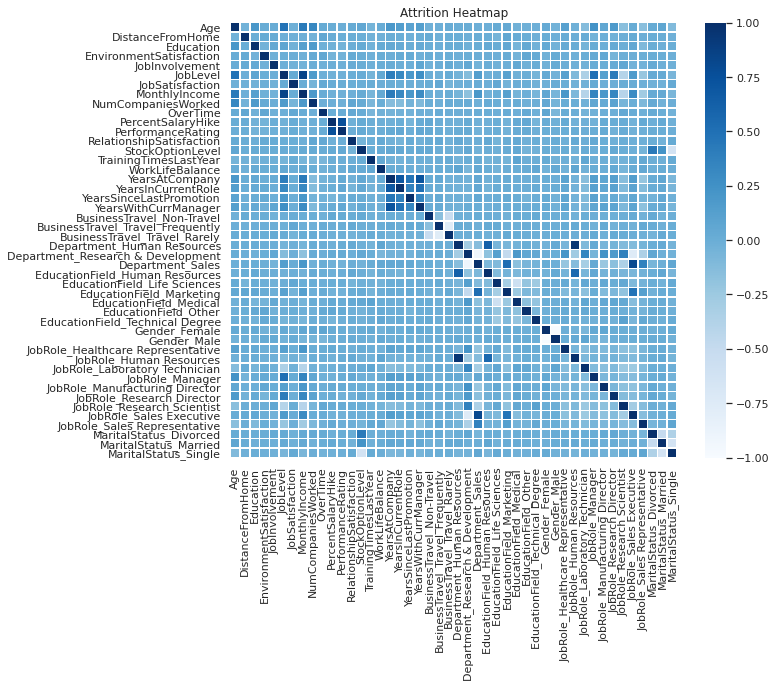

In [1483]:
plt.subplots(figsize=(10,8))
ax = plt.axes()
ax.set_title("Attrition Heatmap")
corr = x.corr()
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values, cmap="Blues",linewidths=.5)

In [1484]:
visualcomparison = pd.concat([x.reset_index(drop=True), y.reset_index(drop=True)], axis=1)

In [1485]:
xtest

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,-0.033022,1.399507,-1.835186,0.237339,-1.054724,-0.953621,-1.571655,-1.413684,-0.669111,-0.633230,-1.155741,-0.414060,1.200344,-0.941309,0.159142,-1.074358,-0.116312,0.500923,0.201288,-0.954645,-0.327568,-0.473777,0.623949,-0.20666,0.732430,-0.667448,-0.12946,-0.847617,-0.35405,1.480872,-0.248004,-0.300689,1.210585,-1.210585,-0.308522,-0.195913,-0.455499,-0.243432,-0.329435,-0.235267,1.932061,-0.545410,-0.246867,-0.530745,-0.939866,1.487778
1,-1.439600,-0.061673,0.107724,0.237339,0.352043,-0.953621,-0.663588,-1.413684,-0.669111,1.579206,-0.879599,-0.414060,-0.643222,-0.941309,-0.610429,-1.074358,-0.116312,-0.438954,0.201288,-0.214444,-0.327568,-0.473777,0.623949,-0.20666,0.732430,-0.667448,-0.12946,1.179778,-0.35405,-0.675278,-0.248004,-0.300689,1.210585,-1.210585,-0.308522,-0.195913,-0.455499,-0.243432,-0.329435,-0.235267,1.932061,-0.545410,-0.246867,-0.530745,-0.939866,1.487778
2,-1.439600,-0.792264,-1.835186,1.158178,0.352043,-0.016845,0.244480,-0.707019,-0.669111,1.579206,-0.879599,-0.414060,0.278561,1.399686,0.159142,0.351945,-0.116312,-0.438954,-1.111345,-0.214444,-0.327568,-0.473777,0.623949,-0.20666,-1.365317,1.498243,-0.12946,-0.847617,-0.35405,1.480872,-0.248004,-0.300689,1.210585,-1.210585,-0.308522,-0.195913,-0.455499,-0.243432,-0.329435,-0.235267,-0.517582,1.833482,-0.246867,-0.530745,1.063981,-0.672143
3,-0.033022,0.668917,1.079178,-1.604338,0.352043,0.919931,-0.663588,0.706313,-0.669111,-0.633230,-0.603457,-0.414060,1.200344,0.229188,2.467856,0.351945,0.606847,0.500923,1.513921,0.525757,3.052800,-0.473777,-1.602694,-0.20666,-1.365317,1.498243,-0.12946,-0.847617,-0.35405,1.480872,-0.248004,-0.300689,-0.826047,0.826047,-0.308522,-0.195913,-0.455499,-0.243432,-0.329435,-0.235267,-0.517582,1.833482,-0.246867,1.884144,-0.939866,-0.672143
4,-0.736311,-1.522854,1.079178,1.158178,0.352043,-0.953621,1.152547,-1.413684,-0.669111,1.579206,-0.603457,-0.414060,0.278561,-0.941309,-0.610429,-1.074358,1.330007,1.440800,1.513921,1.265958,-0.327568,-0.473777,0.623949,-0.20666,0.732430,-0.667448,-0.12946,-0.847617,-0.35405,-0.675278,4.032198,-0.300689,-0.826047,0.826047,-0.308522,-0.195913,-0.455499,-0.243432,-0.329435,-0.235267,1.932061,-0.545410,-0.246867,-0.530745,-0.939866,1.487778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,-0.033022,-0.061673,1.079178,0.237339,0.352043,-0.016845,0.244480,-0.707019,-0.669111,-0.633230,-0.879599,-0.414060,1.200344,0.229188,1.698284,0.351945,1.330007,1.440800,0.201288,1.265958,3.052800,-0.473777,-1.602694,-0.20666,0.732430,-0.667448,-0.12946,1.179778,-0.35405,-0.675278,-0.248004,-0.300689,1.210585,-1.210585,3.241257,-0.195913,-0.455499,-0.243432,-0.329435,-0.235267,-0.517582,-0.545410,-0.246867,-0.530745,1.063981,-0.672143
143,0.670268,1.399507,1.079178,-1.604338,-1.054724,1.856707,-0.663588,1.412978,-1.068742,-0.633230,2.157962,2.415112,0.278561,0.229188,0.159142,0.351945,

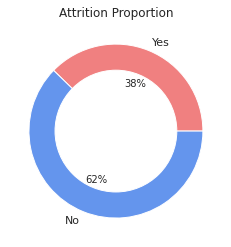

In [1486]:
Y_count = len(data4[data4['Attrition'] == 1])
N_count = len(data4[data4['Attrition'] == 0])
# create data
names='Yes', 'No',
size=[Y_count,N_count]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['lightcoral','cornflowerblue'],autopct='%1.0f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
ax = plt.axes()
ax.set_title("Attrition Proportion")
plt.show()

In [1487]:
visualcomparison

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Attrition
0,-0.736311,-1.522854,-1.835186,1.158178,-1.054724,-0.016845,1.152547,-0.000353,-0.669111,1.579206,-0.879599,-0.414060,0.278561,1.399686,-1.380000,-1.074358,1.330007,1.440800,0.201288,-1.694846,-0.327568,-0.473777,0.623949,-0.20666,0.732430,-0.667448,-0.12946,1.179778,-0.35405,-0.675278,-0.248004,-0.300689,-0.826047,0.826047,-0.308522,-0.195913,2.195397,-0.243432,-0.329435,-0.235267,-0.517582,-0.545410,-0.246867,-0.530745,1.063981,-0.672143,0
1,0.670268,-0.792264,-0.863731,1.158178,-1.054724,0.919931,0.244480,0.706313,0.130149,1.579206,1.053394,-0.414060,1.200344,0.229188,2.467856,1.778247,-0.116312,-0.438954,-1.111345,-0.214444,-0.327568,-0.473777,0.623949,-0.20666,0.732430,-0.667448,-0.12946,-0.847617,-0.35405,1.480872,-0.248004,-0.300689,1.210585,-1.210585,-0.308522,-0.195913,-0.455499,-0.243432,3.035504,-0.235267,-0.517582,-0.545410,-0.246867,-0.530745,1.063981,-0.672143,0
2,-1.439600,-0.061673,0.107724,0.237339,-1.054724,-0.953621,-0.663588,-1.413684,-0.669111,-0.633230,1.053394,-0.414060,0.278561,-0.941309,0.159142,-1.074358,-0.116312,-0.438954,0.201288,-0.214444,-0.327568,-0.473777,0.623949,-0.20666,0.732430,-0.667448,-0.12946,-0.847617,-0.35405,-0.675278,4.032198,-0.300689,1.210585,-1.210585,-0.308522,-0.195913,-0.455499,-0.243432,-0.329435,-0.235267,1.932061,-0.545410,-0.246867,-0.530745,1.063981,-0.672143,0
3,-1.439600,-0.061673,-0.863731,1.158178,0.352043,-0.953621,1.152547,-0.707019,-0.669111,-0.633230,1.605678,2.415112,1.200344,-0.941309,0.159142,0.351945,-0.116312,-0.438954,-1.111345,-0.214444,-0.327568,-0.473777,0.623949,-0.20666,0.732430,-0.667448,-0.12946,1.179778,-0.35405,-0.675278,-0.248004,-0.300689,1.210585,-1.210585,-0.308522,-0.195913,-0.455499,-0.243432,-0.329435,-0.235267,1.932061,-0.545410,-0.246867,-0.530745,-0.939866,1.487778,0
4,-0.033022,-0.792264,-0.863731,0.237339,0.352043,-0.953621,1.152547,-1.413684,-0.669111,-0.633230,-0.879599,-0.414060,0.278561,0.229188,0.159142,0.351945,-1.562632,-1.378831,-1.111345,-1.694846,-0.327568,-0.473777,0.623949,-0.20666,0.732430,-0.667448,-0.12946,-0.847617,-0.35405,-0.675278,4.032198,-0.300689,-0.826047,0.826047,-0.308522,-0.195913,2.195397,-0.243432,-0.329435,-0.235267,-0.517582,-0.545410,-0.246867,1.884144,-0.939866,-0.672143,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,-0.736311,-0.792264,0.107724,-1.604338,-1.054724,-0.016845,-0.663588,0.706313,-0.269481,-0.633230,1.053394,-0.414060,-0.643222,1.399686,-0.610429,0.351945,-1.562632,-1.378831,-1.111345,-1.694846,-0.327568,-0.473777,0.623949,-0.20666,-1.365317,1.498243,-0.12946,-0.847617,-0.35405,1.480872,-0.248004,-0.300689,-0.826047,0.826047,-0.308522,-0.195913,-0.455499,-0.243432,-0.329435,-0.235267,-0.517582,1.833482,-0.246867,-0.530745,1.063981,-0.672143,1
1998,-1.439600,-1.522854,0.107724,1.158178,0.352043,-0.953621,-0.663588,-1.413684,-0.669111,-0.633230,0.777252,-0.4140

In [1488]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y,random_state=42)

Resampling

In [1489]:
# check version number
import imblearn
print(imblearn.__version__)

# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
from collections import Counter
from numpy.random import RandomState
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTENC


0.4.3


In [1490]:
#produkcja świętego i nienaruszalnego zbioru do sprawdzania
y_valid = y_test
x_valid = X_test
x2 = X_train
y2 = y_train

In [1491]:
#resampling
shuffled_df = X_train.merge(y_train, how = 'right', left_index=True, right_index=True)

In [1492]:
normalized_df=shuffled_df 

In [1493]:
X_train

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
509,-0.033022,-0.792264,1.079178,1.158178,0.352043,-0.016845,-1.571655,-0.000353,-0.269481,-0.633230,-1.155741,-0.41406,-1.565005,0.229188,-0.610429,1.778247,-1.562632,-1.378831,-1.111345,-1.694846,3.052800,-0.473777,-1.602694,-0.20666,0.732430,-0.667448,-0.12946,1.179778,-0.35405,-0.675278,-0.248004,-0.300689,1.210585,-1.210585,3.241257,-0.195913,-0.455499,-0.243432,-0.329435,-0.235267,-0.517582,-0.54541,-0.246867,1.884144,-0.939866,-0.672143
1586,-0.033022,1.399507,1.079178,-0.683500,0.352043,-0.016845,-0.663588,0.706313,1.728671,-0.633230,-0.051173,-0.41406,0.278561,0.229188,0.159142,0.351945,0.606847,1.440800,-1.111345,1.265958,3.052800,-0.473777,-1.602694,-0.20666,0.732430,-0.667448,-0.12946,1.179778,-0.35405,-0.675278,-0.248004,-0.300689,1.210585,-1.210585,-0.308522,-0.195913,2.195397,-0.243432,-0.329435,-0.235267,-0.517582,-0.54541,-0.246867,-0.530745,1.063981,-0.672143
1893,1.373557,1.399507,1.079178,0.237339,0.352043,-0.016845,-1.571655,0.706313,-0.669111,-0.633230,-0.327315,-0.41406,0.278561,-0.941309,-0.610429,-1.074358,1.330007,1.440800,1.513921,1.265958,-0.327568,-0.473777,0.623949,-0.20666,0.732430,-0.667448,-0.12946,-0.847617,-0.35405,1.480872,-0.248004,-0.300689,1.210585,-1.210585,-0.308522,-0.195913,-0.455499,-0.243432,3.035504,-0.235267,-0.517582,-0.54541,-0.246867,-0.530745,1.063981,-0.672143
979,0.670268,-0.061673,-0.863731,-0.683500,0.352043,-0.953621,0.244480,-1.413684,0.529780,-0.633230,0.501111,-0.41406,1.200344,0.229188,0.928713,0.351945,-0.839472,-0.438954,0.201288,-1.694846,-0.327568,2.110697,-1.602694,-0.20666,0.732430,-0.667448,-0.12946,-0.847617,-0.35405,-0.675278,4.032198,-0.300689,-0.826047,0.826047,-0.308522,-0.195913,2.195397,-0.243432,-0.329435,-0.235267,-0.517582,-0.54541,-0.246867,-0.530745,1.063981,-0.672143
770,1.373557,-0.061673,1.079178,-1.604338,-2.461492,0.919931,1.152547,1.412978,-0.269481,-0.633230,-0.051173,-0.41406,1.200344,-0.941309,-0.610429,0.351945,-0.116312,-0.438954,-1.111345,-0.214444,-0.327568,2.110697,-1.602694,-0.20666,0.732430,-0.667448,-0.12946,1.179778,-0.35405,-0.675278,-0.248004,-0.300689,-0.826047,0.826047,-0.308522,-0.195913,-0.455499,-0.243432,3.035504,-0.235267,-0.517582,-0.54541,-0.246867,-0.530745,-0.939866,1.487778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,-0.736311,0.668917,0.107724,-0.683500,0.352043,-0.953621,1.152547,-1.413684,-0.669111,-0.633230,-0.603457,-0.41406,0.278561,-0.941309,0.159142,-1.074358,-1.562632,-1.378831,-1.111345,-1.694846,-0.327568,-0.473777,0.623949,-0.20666,-1.365317,1.498243,-0.12946,-0.847617,-0.35405,1.480872,-0.248004,-0.300689,-0.826047,0.826047,-0.308522,-0.195913,-0.455499,-0.243432,-0.329435,-0.235267,-0.517582,-0.54541,4.050765,-0.530745,-0.939866,1.487778
1854,-1.439600,-0.792264,1.079178,0.237339,-1.054724,-0.953621,1.152547,-0.707019,-1.068742,1.579206,-1.155741,-0.41406,-0.643222,0.229188,1.698284,0.

In [1494]:
sm = SMOTENC(random_state=42, categorical_features=[3,4,5,6,8, 9,10,11,12,13,14,15,16,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45])
X_res, y_res = sm.fit_resample(X_train, y_train)

In [1495]:
res_train = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
res_train.columns = normalized_df.columns

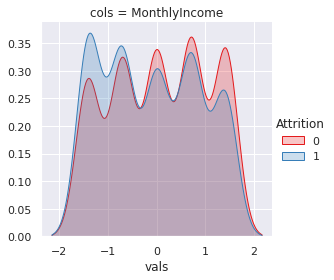

In [1496]:
Age_YAC_NCW = res_train[[ 'MonthlyIncome','Attrition']]
Age_YAC_NCW.head()
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
AYN_melt.head()
g = sns.FacetGrid(AYN_melt, col='cols', hue="Attrition", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())
#Focus on the red area--distribution of Attrition
#Lots of attrition among the 'young' employees (for Age or for YearsAtCompany)-- not surprising -- trial to find a suit -- company culture.. 
#Those who have worked in more than 5 companies tend to attrit. -- The average time spent in every company is shorter -- HR insight..

In [1497]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [1498]:
y_train_res = res_train.iloc[:,-1]
x_train_res = res_train.iloc[:,:-1]

In [1499]:
x_train_res

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,-0.033022,-0.792264,1.079178,1.158178,0.352043,-0.016845,-1.571655,-0.000353,-0.269481,-0.633230,-1.155741,-0.41406,-1.565005,0.229188,-0.610429,1.778247,-1.562632,-1.378831,-1.111345,-1.694846,3.052800,-0.473777,-1.602694,-0.20666,0.732430,-0.667448,-0.12946,1.179778,-0.354050,-0.675278,-0.248004,-0.300689,1.210585,-1.210585,3.241257,-0.195913,-0.455499,-0.243432,-0.329435,-0.235267,-0.517582,-0.545410,-0.246867,1.884144,-0.939866,-0.672143
1,-0.033022,1.399507,1.079178,-0.683500,0.352043,-0.016845,-0.663588,0.706313,1.728671,-0.633230,-0.051173,-0.41406,0.278561,0.229188,0.159142,0.351945,0.606847,1.440800,-1.111345,1.265958,3.052800,-0.473777,-1.602694,-0.20666,0.732430,-0.667448,-0.12946,1.179778,-0.354050,-0.675278,-0.248004,-0.300689,1.210585,-1.210585,-0.308522,-0.195913,2.195397,-0.243432,-0.329435,-0.235267,-0.517582,-0.545410,-0.246867,-0.530745,1.063981,-0.672143
2,1.373557,1.399507,1.079178,0.237339,0.352043,-0.016845,-1.571655,0.706313,-0.669111,-0.633230,-0.327315,-0.41406,0.278561,-0.941309,-0.610429,-1.074358,1.330007,1.440800,1.513921,1.265958,-0.327568,-0.473777,0.623949,-0.20666,0.732430,-0.667448,-0.12946,-0.847617,-0.354050,1.480872,-0.248004,-0.300689,1.210585,-1.210585,-0.308522,-0.195913,-0.455499,-0.243432,3.035504,-0.235267,-0.517582,-0.545410,-0.246867,-0.530745,1.063981,-0.672143
3,0.670268,-0.061673,-0.863731,-0.683500,0.352043,-0.953621,0.244480,-1.413684,0.529780,-0.633230,0.501111,-0.41406,1.200344,0.229188,0.928713,0.351945,-0.839472,-0.438954,0.201288,-1.694846,-0.327568,2.110697,-1.602694,-0.20666,0.732430,-0.667448,-0.12946,-0.847617,-0.354050,-0.675278,4.032198,-0.300689,-0.826047,0.826047,-0.308522,-0.195913,2.195397,-0.243432,-0.329435,-0.235267,-0.517582,-0.545410,-0.246867,-0.530745,1.063981,-0.672143
4,1.373557,-0.061673,1.079178,-1.604338,-2.461492,0.919931,1.152547,1.412978,-0.269481,-0.633230,-0.051173,-0.41406,1.200344,-0.941309,-0.610429,0.351945,-0.116312,-0.438954,-1.111345,-0.214444,-0.327568,2.110697,-1.602694,-0.20666,0.732430,-0.667448,-0.12946,1.179778,-0.354050,-0.675278,-0.248004,-0.300689,-0.826047,0.826047,-0.308522,-0.195913,-0.455499,-0.243432,3.035504,-0.235267,-0.517582,-0.545410,-0.246867,-0.530745,-0.939866,1.487778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.670268,0.668917,0.107724,-1.604338,-1.054724,-0.016845,-1.571655,-0.000353,0.529780,-0.633230,-0.603457,-0.41406,-1.565005,-0.941309,-0.610429,-1.074358,-0.116312,-0.438954,1.046497,-0.214444,-0.327568,-0.473777,0.623949,-0.20666,-1.365317,1.498243,-0.12946,-0.847617,2.824461,-0.675278,-0.248004,-0.300689,1.210585,-1.210585,-0.308522,-0.195913,-0.455499,-0.243432,-0.329435,-0.235267,-0.517582,1.833482,-0.246867,-0.530745,1.063981,-0.672143
1990,-0.033022,-1.522854,1.079178,0.237339,-1.054724,0.919931,0.244480,1.412978,-0.669111,-0.633230,0.777252,-0.41406,0.278561,0.229188,-0.610429,0.

In [1500]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
forward_selection(x_train_res, y_train_res)

['JobLevel',
 'BusinessTravel_Non-Travel',
 'StockOptionLevel',
 'OverTime',
 'YearsSinceLastPromotion',
 'EnvironmentSatisfaction',
 'PerformanceRating',
 'DistanceFromHome',
 'EducationField_Medical',
 'EducationField_Life Sciences',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'EducationField_Marketing',
 'EducationField_Human Resources',
 'Age',
 'JobSatisfaction',
 'YearsInCurrentRole',
 'YearsAtCompany',
 'JobRole_Manufacturing Director',
 'JobRole_Healthcare Representative',
 'JobRole_Manager',
 'JobRole_Research Director',
 'Department_Human Resources',
 'PercentSalaryHike',
 'JobRole_Research Scientist',
 'JobRole_Laboratory Technician',
 'Department_Research & Development']

In [1501]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [1502]:
sfs.fit(x_train_res, y_train_res)
sfs.k_feature_names_

('DistanceFromHome',
 'EnvironmentSatisfaction',
 'JobLevel',
 'OverTime',
 'PerformanceRating',
 'StockOptionLevel',
 'YearsSinceLastPromotion',
 'BusinessTravel_Non-Travel',
 'EducationField_Life Sciences',
 'EducationField_Medical',
 'EducationField_Other')

In [1503]:
x_train_res

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,-0.033022,-0.792264,1.079178,1.158178,0.352043,-0.016845,-1.571655,-0.000353,-0.269481,-0.633230,-1.155741,-0.41406,-1.565005,0.229188,-0.610429,1.778247,-1.562632,-1.378831,-1.111345,-1.694846,3.052800,-0.473777,-1.602694,-0.20666,0.732430,-0.667448,-0.12946,1.179778,-0.354050,-0.675278,-0.248004,-0.300689,1.210585,-1.210585,3.241257,-0.195913,-0.455499,-0.243432,-0.329435,-0.235267,-0.517582,-0.545410,-0.246867,1.884144,-0.939866,-0.672143
1,-0.033022,1.399507,1.079178,-0.683500,0.352043,-0.016845,-0.663588,0.706313,1.728671,-0.633230,-0.051173,-0.41406,0.278561,0.229188,0.159142,0.351945,0.606847,1.440800,-1.111345,1.265958,3.052800,-0.473777,-1.602694,-0.20666,0.732430,-0.667448,-0.12946,1.179778,-0.354050,-0.675278,-0.248004,-0.300689,1.210585,-1.210585,-0.308522,-0.195913,2.195397,-0.243432,-0.329435,-0.235267,-0.517582,-0.545410,-0.246867,-0.530745,1.063981,-0.672143
2,1.373557,1.399507,1.079178,0.237339,0.352043,-0.016845,-1.571655,0.706313,-0.669111,-0.633230,-0.327315,-0.41406,0.278561,-0.941309,-0.610429,-1.074358,1.330007,1.440800,1.513921,1.265958,-0.327568,-0.473777,0.623949,-0.20666,0.732430,-0.667448,-0.12946,-0.847617,-0.354050,1.480872,-0.248004,-0.300689,1.210585,-1.210585,-0.308522,-0.195913,-0.455499,-0.243432,3.035504,-0.235267,-0.517582,-0.545410,-0.246867,-0.530745,1.063981,-0.672143
3,0.670268,-0.061673,-0.863731,-0.683500,0.352043,-0.953621,0.244480,-1.413684,0.529780,-0.633230,0.501111,-0.41406,1.200344,0.229188,0.928713,0.351945,-0.839472,-0.438954,0.201288,-1.694846,-0.327568,2.110697,-1.602694,-0.20666,0.732430,-0.667448,-0.12946,-0.847617,-0.354050,-0.675278,4.032198,-0.300689,-0.826047,0.826047,-0.308522,-0.195913,2.195397,-0.243432,-0.329435,-0.235267,-0.517582,-0.545410,-0.246867,-0.530745,1.063981,-0.672143
4,1.373557,-0.061673,1.079178,-1.604338,-2.461492,0.919931,1.152547,1.412978,-0.269481,-0.633230,-0.051173,-0.41406,1.200344,-0.941309,-0.610429,0.351945,-0.116312,-0.438954,-1.111345,-0.214444,-0.327568,2.110697,-1.602694,-0.20666,0.732430,-0.667448,-0.12946,1.179778,-0.354050,-0.675278,-0.248004,-0.300689,-0.826047,0.826047,-0.308522,-0.195913,-0.455499,-0.243432,3.035504,-0.235267,-0.517582,-0.545410,-0.246867,-0.530745,-0.939866,1.487778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.670268,0.668917,0.107724,-1.604338,-1.054724,-0.016845,-1.571655,-0.000353,0.529780,-0.633230,-0.603457,-0.41406,-1.565005,-0.941309,-0.610429,-1.074358,-0.116312,-0.438954,1.046497,-0.214444,-0.327568,-0.473777,0.623949,-0.20666,-1.365317,1.498243,-0.12946,-0.847617,2.824461,-0.675278,-0.248004,-0.300689,1.210585,-1.210585,-0.308522,-0.195913,-0.455499,-0.243432,-0.329435,-0.235267,-0.517582,1.833482,-0.246867,-0.530745,1.063981,-0.672143
1990,-0.033022,-1.522854,1.079178,0.237339,-1.054724,0.919931,0.244480,1.412978,-0.669111,-0.633230,0.777252,-0.41406,0.278561,0.229188,-0.610429,0.

In [1505]:
#Sequential backward selection(sbs)
sbs = SFS(LinearRegression(),
         k_features=10,
         forward=False,
         floating=False,
         cv=0)
sbs.fit(x_train_res, y_train_res)
sbs.k_feature_names_

TypeError: ignored

In [1506]:
sfs1 = SFS(LinearRegression(),
         k_features=(3,41),
         forward=True,
         floating=False,
         cv=0)
sfs1.fit(x_train_res, y_train_res)

SequentialFeatureSelector(clone_estimator=True, cv=0,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          floating=False, forward=True, k_features=(3, 41),
                          n_jobs=1, pre_dispatch='2*n_jobs', scoring=None,
                          verbose=0)

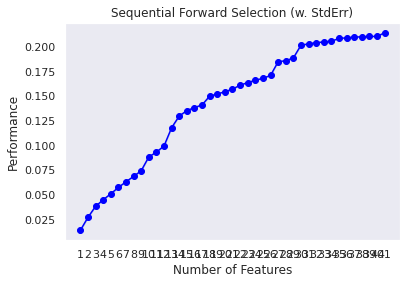

In [1507]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

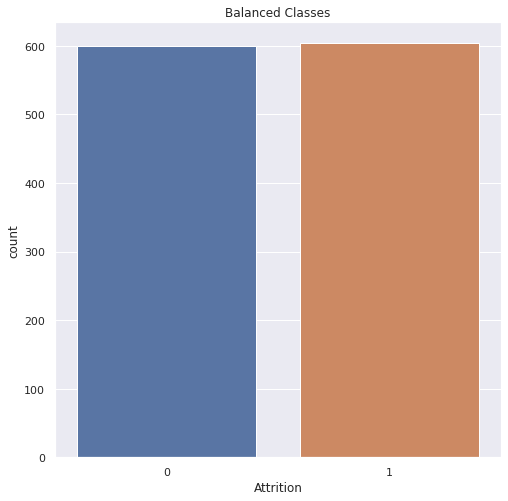

In [1508]:
shuffled_df = shuffled_df.sample(frac=1,random_state=4)
# Put all the fraud class in a separate dataset.
att_df = shuffled_df.loc[shuffled_df['Attrition'] == 1]
#Randomly select 492 observations from the non-fraud (majority class)
non_att_df = shuffled_df.loc[shuffled_df['Attrition'] == 0].sample(n=600,random_state=42)

normalized_df = pd.concat([non_att_df, att_df], axis=0)
normalized_df = normalized_df.sample(frac=1,random_state=4)
#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('Attrition', data=normalized_df)
plt.title('Balanced Classes')
plt.show()

In [1509]:
y_train_under = normalized_df.iloc[:,-1]
x_train_under = normalized_df.iloc[:,:-1]


In [1510]:
# x_train_res_drop = x_train_res.loc[:,['OverTime','StockOptionLevel', 'JobRole_Manufacturing Director','JobRole_Healthcare Representative','EducationField_Marketing','EducationField_Life Sciences','EducationField_Medical', 'EducationField_Other',  'MonthlyIncome','DistanceFromHome', 'EducationField_Technical Degree', 'EducationField_Human Resources','Age', 'JobRole_Research Scientist'  ]]
# x_valid_drop = x_valid.loc[:,['OverTime','StockOptionLevel', 'JobRole_Manufacturing Director','JobRole_Healthcare Representative','EducationField_Marketing','EducationField_Life Sciences','EducationField_Medical', 'EducationField_Other',  'MonthlyIncome','DistanceFromHome', 'EducationField_Technical Degree', 'EducationField_Human Resources','Age', 'JobRole_Research Scientist'  ]]
# x_test_drop = xtest.loc[:,['OverTime','StockOptionLevel', 'JobRole_Manufacturing Director','JobRole_Healthcare Representative','EducationField_Marketing','EducationField_Life Sciences','EducationField_Medical', 'EducationField_Other',  'MonthlyIncome','DistanceFromHome', 'EducationField_Technical Degree', 'EducationField_Human Resources','Age', 'JobRole_Research Scientist'  ]]

In [1511]:
# x_train_res=x_train_res_drop
# x_valid=x_valid_drop

dla niezbalansowanego zbioru - BalancedBaggingClassifier - nie pomogło

In [1512]:
from imblearn.ensemble import BalancedBaggingClassifier
# from sklearn.tree import DecisionTreeClassifier

# #Create an object of the classifier.
# bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
#                                 sampling_strategy='auto',
#                                 replacement=False,
#                                 random_state=0)


# #Train the classifier.
# bbc.fit(X_train, y_train)
# preds = bbc.predict(X_train)

In [1513]:
# print_results(calculate_metrics(y_train, preds), 'balanced')


In [1514]:
# cm = confusion_matrix(y_train, preds)
# sns.heatmap(cm, annot=True, fmt='d')
# print(classification_report(y_train, preds))

In [1515]:
# preds = bbc.predict(X_test)

In [1516]:
# print_results(calculate_metrics(y_test, preds), 'balanced')

In [1517]:
# cm = confusion_matrix(y_test, preds)
# sns.heatmap(cm, annot=True, fmt='d')
# print(classification_report(y_test, preds))

In [1518]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y,random_state=42)

In [1519]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train, test in cv.split(x_train_res, y_train_res):
  X_train_kfold, y_train_kfold = x_train_res.iloc[train], y_train_res.iloc[train]
  X_test_kfold, y_test_kfold = x_train_res.iloc[test], y_train_res.iloc[test]

SVC
              precision    recall  f1-score   support

           0       0.62      0.72      0.67       250
           1       0.38      0.28      0.32       151

    accuracy                           0.55       401
   macro avg       0.50      0.50      0.49       401
weighted avg       0.53      0.55      0.54       401



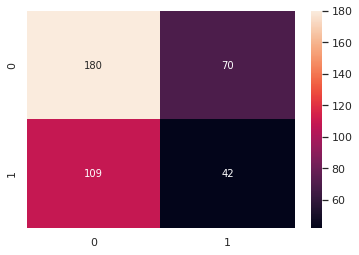

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.58      0.59      0.58       250
           1       0.29      0.28      0.28       151

    accuracy                           0.47       401
   macro avg       0.43      0.44      0.43       401
weighted avg       0.47      0.47      0.47       401



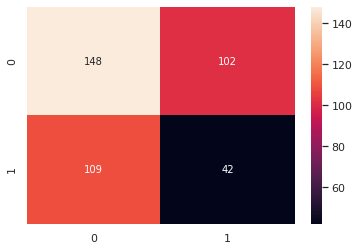

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.58      0.59      0.59       250
           1       0.31      0.30      0.31       151

    accuracy                           0.48       401
   macro avg       0.45      0.45      0.45       401
weighted avg       0.48      0.48      0.48       401



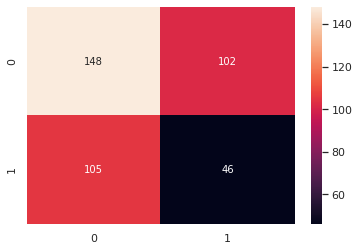

In [1520]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
classifiers = [SVC, KNeighborsClassifier, DecisionTreeClassifier]
for classifier_class in classifiers:
    model = classifier_class()
    model.fit(x_train_res, y_train_res)
    y_pred = model.predict(x_valid)
    print(model.__class__.__name__)
    print(classification_report(y_valid, y_pred))
    cm = confusion_matrix(y_valid, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

SVC
              precision    recall  f1-score   support

           0       0.63      0.71      0.67       250
           1       0.38      0.30      0.34       151

    accuracy                           0.56       401
   macro avg       0.51      0.51      0.50       401
weighted avg       0.54      0.56      0.54       401



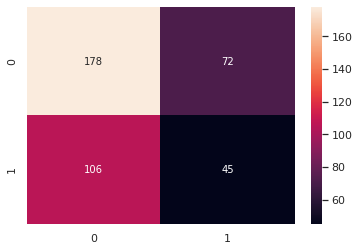

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.59      0.58      0.58       250
           1       0.32      0.32      0.32       151

    accuracy                           0.48       401
   macro avg       0.45      0.45      0.45       401
weighted avg       0.49      0.48      0.48       401



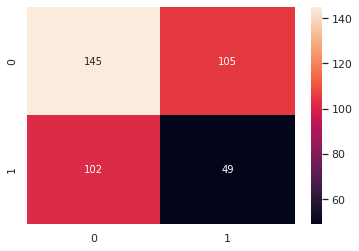

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.57      0.56      0.57       250
           1       0.30      0.31      0.31       151

    accuracy                           0.47       401
   macro avg       0.44      0.44      0.44       401
weighted avg       0.47      0.47      0.47       401



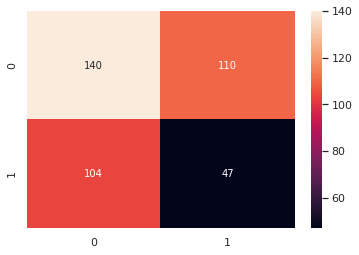

In [1521]:

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
classifiers = [SVC, KNeighborsClassifier, DecisionTreeClassifier]
for classifier_class in classifiers:
    model = classifier_class()
    model.fit(X_train_kfold, y_train_kfold)
    y_pred_kfold = model.predict(x_valid)
    print(model.__class__.__name__)
    print(classification_report(y_valid, y_pred_kfold))
    cm = confusion_matrix(y_valid, y_pred_kfold)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

KNN


In [1522]:
from sklearn.neighbors import KNeighborsClassifier
# Create and fit the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_res, y_train_res)
# Predict on the test features, print the results
pred = knn.predict(x_valid)

In [1523]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy
def calculate_metrics(target, prediction, average='micro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total
def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

In [1524]:
print_results(calculate_metrics(y_valid, pred), 'kNN')

Results for kNN
----
  Accuracy:  0.47381546134663344
  Precision: 0.47381546134663344
  Recall:    0.47381546134663344
  F1 score:  0.47381546134663344
  Mislabeled 211 out of 401




In [1525]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

Results for kNN
----
  Accuracy:  0.47381546134663344
  Precision: 0.47381546134663344
  Recall:    0.47381546134663344
  F1 score:  0.47381546134663344
  Mislabeled 211 out of 401


              precision    recall  f1-score   support

           0       0.58      0.59      0.58       250
           1       0.29      0.28      0.28       151

    accuracy                           0.47       401
   macro avg       0.43      0.44      0.43       401
weighted avg       0.47      0.47      0.47       401



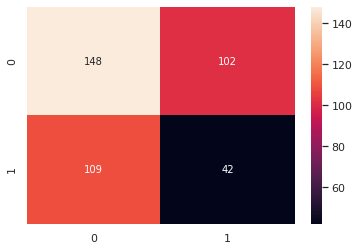

In [1526]:
print_results(calculate_metrics(y_valid, pred), 'kNN')
cm = confusion_matrix(y_valid, pred)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_valid, pred))

In [1527]:
from sklearn.model_selection import GridSearchCV

In [1528]:
# params_knn = {
#     'n_neighbors': [2, 3, 5, 7, 10, 15],
#     'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree']
# }
# clf  = GridSearchCV(KNeighborsClassifier(), params_knn, scoring = 'recall')
# clf.fit(x_train_res, y_train_res)
# clf.best_params_

In [1529]:
knn = KNeighborsClassifier(algorithm= 'ball_tree', metric= 'manhattan', n_neighbors= 15)

In [1530]:
knn.fit(X_train_kfold, y_train_kfold)
y_pred_kfold = knn.predict(x_valid)

In [1531]:
print_results(calculate_metrics(y_valid, y_pred_kfold), 'kNN for KFold')

Results for kNN for KFold
----
  Accuracy:  0.46384039900249374
  Precision: 0.46384039900249374
  Recall:    0.46384039900249374
  F1 score:  0.46384039900249374
  Mislabeled 215 out of 401




              precision    recall  f1-score   support

           0       0.59      0.46      0.52       250
           1       0.34      0.47      0.40       151

    accuracy                           0.46       401
   macro avg       0.47      0.47      0.46       401
weighted avg       0.50      0.46      0.47       401



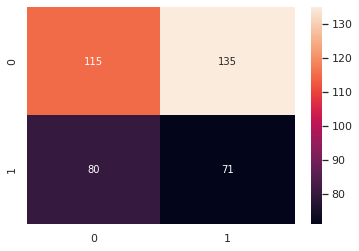

In [1532]:
cm = confusion_matrix(y_valid, y_pred_kfold)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_valid, y_pred_kfold))

In [1533]:
y_pred = knn.predict(xtest)
y_final = knn.predict(xtest)



In [1534]:
y_final = pd.DataFrame(y_final)
y_final

,0
0,1
1,1
2,0
3,0
4,0
...,...
142,0
143,0
144,1
145,0


In [1535]:
sampleoutput = pd.concat([testy.reset_index(drop=True), y_final.reset_index(drop=True)], axis=1)
sample_output = sampleoutput.drop(['Attrition'], axis=1)
sample_output2 = sample_output.rename(columns={0:'Attrition'})
sample_output2
sample_output2.to_csv("y_pred.csv", index=False)

SVC

In [1536]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import recall_score

# params_grid = {
#     'C': [0.01, 0.1, 1, 10, 100,],
#     'class_weight': [None, "balanced"],
# 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]
# }

# clf = GridSearchCV(SVC(), params_grid, scoring="f1")
# clf.fit(X_train_kfold, y_train_kfold)

In [1537]:
y_pred = clf.predict(x_valid)
print(classification_report(y_valid, y_pred))

NotFittedError: ignored

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [1538]:
model = SVC(C=1, class_weight=None, kernel="rbf")
model.fit(X_train_kfold, y_train_kfold)
y_pred = model.predict(x_valid)

In [1539]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.71      0.67       250
           1       0.38      0.30      0.34       151

    accuracy                           0.56       401
   macro avg       0.51      0.51      0.50       401
weighted avg       0.54      0.56      0.54       401



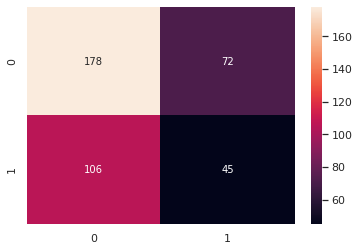

In [1540]:
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [1541]:
model.fit(X_train_kfold, y_train_kfold)
y_pred = model.predict(x_valid)

In [1542]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.71      0.67       250
           1       0.38      0.30      0.34       151

    accuracy                           0.56       401
   macro avg       0.51      0.51      0.50       401
weighted avg       0.54      0.56      0.54       401



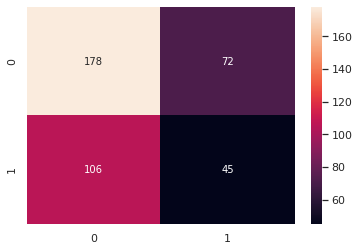

In [1543]:
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

MaritalStatus_Married-0.00%
Representative-0.00%
JobRole_Research Scientist-0.00%
JobRole_Manager-0.00%
EducationField_Human Resources-0.00%
EducationField_Life Sciences-0.00%
JobRole_Healthcare Representative-0.20%
JobRole_Research Director-0.27%
EducationField_Marketing-0.44%
MaritalStatus_Divorced-0.64%
EducationField_Technical Degree-0.67%
JobRole_Sales-0.94%
JobRole_Human Resources-0.95%
EducationField_Other-1.46%
Education-1.61%
JobRole_Sales Executive-1.79%
JobRole_Laboratory Technician-2.18%
EducationField_Medical-2.39%
JobRole_Manufacturing Director-5.32%
NumCompaniesWorked-7.64%
DistanceFromHome-8.13%
HourlyRate-10.30%
JobInvolvement-10.65%
JobSatisfaction-11.68%
MonthlyIncome-14.35%
Age-18.38%

In [1544]:
yvalid=pd.DataFrame(y_valid)

In [1545]:
from sklearn.linear_model import LogisticRegression

In [1546]:
log_reg_model = LogisticRegression(max_iter=10000000, solver = "newton-cg")
log_reg_model.fit(X_train_kfold, y_train_kfold)
y_pred = log_reg_model.predict(x_valid)

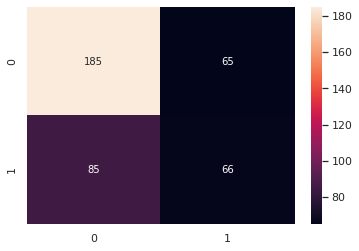

In [1547]:
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [1548]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       250
           1       0.50      0.44      0.47       151

    accuracy                           0.63       401
   macro avg       0.59      0.59      0.59       401
weighted avg       0.62      0.63      0.62       401



piklujemy najlepszy plik

In [1549]:
# #picklujemy ;pp

y_final = model.predict(xtest)



In [1550]:
# testy

In [1551]:
y_final = pd.DataFrame(y_final)
y_final

,0
0,1
1,1
2,0
3,0
4,0
...,...
142,0
143,0
144,1
145,0


In [1552]:
sampleoutput = pd.concat([testy.reset_index(drop=True), y_final.reset_index(drop=True)], axis=1)

In [1553]:
sample_output = sampleoutput.drop(['Attrition'], axis=1)


In [1554]:
sample_output2 = sample_output.rename(columns={0:'Attrition'})
sample_output2

,EmployeeNumber,Attrition
0,100000,1
1,100001,1
2,100002,0
3,100003,0
4,100004,0
...,...,...
142,100142,0
143,100143,0
144,100144,1
145,100145,0


In [1555]:
sample_output2.to_csv("y_pred.csv", index=False)

In [1556]:
########################################0.49

In [1578]:
log_reg_model = LogisticRegression(C=1, max_iter=10000, solver = "newton-cg")
log_reg_model.fit(X_train_kfold, y_train_kfold)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [1579]:
y_pred2 = log_reg_model.predict(x_valid)
print("Model accruracy score: {}".format(accuracy_score(y_valid, y_pred2)))

Model accruracy score: 0.6259351620947631


In [1580]:
print(classification_report(y_valid, y_pred2))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       250
           1       0.50      0.44      0.47       151

    accuracy                           0.63       401
   macro avg       0.59      0.59      0.59       401
weighted avg       0.62      0.63      0.62       401



In [1560]:
model = LogisticRegression()
from sklearn.model_selection import RepeatedStratifiedKFold

In [1561]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [1562]:
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']


In [1563]:
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='recall', n_jobs=-1, cv=cv, random_state=1)

In [1564]:
# execute search
result = search.fit(X_train_kfold, y_train_kfold)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.597695147679325
Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1'}


In [1565]:
model = LogisticRegression(solver= 'liblinear', penalty= 'l1')

In [1566]:
model.fit(X_train_kfold, y_train_kfold)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [1567]:
y_pred2 = log_reg_model.predict(x_valid)
print("Model accruracy score: {}".format(accuracy_score(y_valid, y_pred2)))

Model accruracy score: 0.6259351620947631


In [1568]:
print(classification_report(y_valid, y_pred2))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       250
           1       0.50      0.44      0.47       151

    accuracy                           0.63       401
   macro avg       0.59      0.59      0.59       401
weighted avg       0.62      0.63      0.62       401



In [1569]:
model_params = {
    # randomly sample numbers from 4 to 204 estimators
    'n_estimators': randint(4,200),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    'min_samples_split': uniform(0.01, 0.199)
}

In [1571]:
# create random forest classifier model
rf_model = RandomForestClassifier()

# set up random search meta-estimator
# this will train 100 models over 5 folds of cross validation (500 models total)
clf = RandomizedSearchCV(rf_model, model_params, n_iter=100, cv=5, random_state=1, scoring='recall')

# train the random search meta-estimator to find the best model out of 100 candidates
model = clf.fit(X_train_kfold, y_train_kfold)

# print winning set of hyperparameters
from pprint import pprint
pprint(model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 0.2771471252500715,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 0.1477722005181935,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 5,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [1572]:
rf_model = RandomForestClassifier(bootstrap= True,
 ccp_alpha= 0.0,
 class_weight= None,
 criterion= 'gini',
 max_depth= None,
 max_features= 0.2771471252500715,
 max_leaf_nodes= None,
 max_samples= None,
 min_impurity_decrease= 0.0,
 min_impurity_split= None,
 min_samples_leaf= 1,
 min_samples_split= 0.1477722005181935,
 min_weight_fraction_leaf= 0.0,
 n_estimators= 5,
 n_jobs= None,
 oob_score= False,
 random_state= None,
 verbose= 0,
 warm_start= False)

In [1573]:
model = rf_model.fit(X_train_kfold, y_train_kfold)

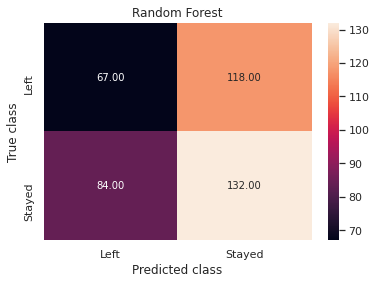

In [1574]:
y_preddr = rf_model.predict(x_valid)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_preddr, y_valid, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [1575]:
print(classification_report(y_preddr, y_valid))

              precision    recall  f1-score   support

           0       0.53      0.61      0.57       216
           1       0.44      0.36      0.40       185

    accuracy                           0.50       401
   macro avg       0.49      0.49      0.48       401
weighted avg       0.49      0.50      0.49       401



In [ ]:
y_final = rf_model.predict(xdrtest)

In [ ]:
y_final = rf_model.predict(xdrtest)
y_final = pd.DataFrame(y_final)
sampleoutput = pd.concat([testy.reset_index(drop=True), y_final.reset_index(drop=True)], axis=1)
sample_output = sampleoutput.drop(['Attrition'], axis=1)
sample_output2 = sample_output.rename(columns={0:'Attrition'})
sample_output2
sample_output2.to_csv("y_pred.csv", index=False)

drzewo

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [ ]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

In [ ]:
# plt.figure(dpi=300)
# plot_tree(clf)
# plt.show()

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train_kfold, y_train_kfold)
y_dt_train =  clf.predict(X_train_kfold)
print_results(calculate_metrics(y_train_kfold.values, y_dt_train), 'Decision Tree train')
cm = confusion_matrix(y_train_kfold, y_dt_train)
sns.heatmap(cm, annot=True, fmt='d')


In [ ]:
y_dt = clf.predict(x_valid)
print_results(calculate_metrics(y_valid, y_dt), 'Decision Tree train')
cm = confusion_matrix(y_valid, y_dt)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(x_train_res, y_train_res)
y_dt = clf.predict(x_valid)

In [ ]:
y_dt_train =  clf.predict(x_valid)
print_results(calculate_metrics(y_valid, y_dt_train), 'Decision Tree train')
cm = confusion_matrix(y_valid, y_dt_train)
sns.heatmap(cm, annot=True, fmt='d')


In [ ]:
y_dt = clf.predict(X_test)
print_results(calculate_metrics(y_test.values, y_dt), 'Decision Tree train')
cm = confusion_matrix(y_test, y_dt)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
def plot_confusion_matrix(confusion_matrix, classes, title=None,
                          title_appendix='',
                          cmap=plt.cm.Blues):
    # tytuł wykresu
    if title_appendix:
        title_appendix = f'({title_appendix})'
    if title is None:
        title = f'Confusion matrix {title_appendix}'
    fig, ax = plt.subplots()
    # rysuje CM
    img = ax.imshow(confusion_matrix, cmap=cmap)
    # dodaje pasek z boku
    ax.figure.colorbar(img, ax=ax)
    # dodatki do wykresu
    ax.set_xticks(np.arange(confusion_matrix.shape[1]))
    ax.set_xticklabels(classes, rotation=45, ha='right', rotation_mode='anchor')
    ax.set_yticks(np.arange(confusion_matrix.shape[0]))
    ax.set_yticklabels(classes, rotation=45, ha='right', rotation_mode='anchor')
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    # etykiety
    fmt = '.2f' if confusion_matrix.dtype == 'float' else 'd'
    thresh = confusion_matrix.max() / 2
    for y, row in enumerate(confusion_matrix):
        for x, cell in enumerate(row):
            ax.text(x, y, format(cell, fmt),
                    ha='center', va='center',
                    color='white' if cell > thresh else 'black')
    fig.tight_layout()
    return ax

In [ ]:
#print_results(calculate_metrics(y_test.values, y_dt), 'Decision Tree test')
#cm = confusion_matrix(y_test, y_dt)
#plot_confusion_matrix(cm, y)

In [ ]:
#classes = cleaneddata.pop(y).unique()

In [ ]:
print_results(calculate_metrics(y_test.values, y_dt), 'Decision Tree test')
cm = confusion_matrix(y_test, y_dt)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
print(X_train)

random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [ ]:
clf = GaussianNB()
clf.fit(X_train_kfold, y_train_kfold)

In [ ]:
y_pred = clf.predict(x_valid)
print(classification_report(y_valid, y_pred))

In [ ]:
gnb = GaussianNB()  # inny klasyfikator
gnb.fit(X_train_kfold, y_train_kfold)
y_gnb = gnb.predict(x_valid)
print(y_valid.values)
print(y_gnb)
print(confusion_matrix(y_valid,y_gnb))

f1 = 0.48

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy

def calculate_metrics(target, prediction, average='macro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

In [ ]:
y_pred = clf.predict(x_valid)
print(classification_report(y_valid, y_pred))
gnb = GaussianNB()  # inny klasyfikator
gnb.fit(X_train_kfold, y_train_kfold)
y_gnb = gnb.predict(x_valid)
print(y_valid.values)
print(y_gnb)
print(confusion_matrix(y_valid,y_gnb))
print_results(calculate_metrics(y_valid.values, y_gnb), 'GNB')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_kfold, y_train_kfold)

In [ ]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_valid, rf.predict(x_valid))))

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, shuffle=True,random_state=7)
modelCV = RandomForestClassifier()
scoring = 'recall'
results = model_selection.cross_val_score(modelCV, x_train_res, y_train_res, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, rf.predict(x_valid)))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
y_pred = rf.predict(x_valid)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_kfold, y_train_kfold)

In [ ]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_valid, svc.predict(x_valid))))

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'f1'
results = model_selection.cross_val_score(modelCV, x_train_res, y_train_res, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

In [ ]:
print(classification_report(y_valid, svc.predict(x_valid)))

In [ ]:
svc_y_pred = svc.predict(x_valid)
svc_cm = metrics.confusion_matrix(svc_y_pred, y_valid, [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000000000000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train_kfold, y_train_kfold)

In [ ]:
y_predlog = logreg.predict(x_valid)
print(classification_report(y_valid, y_predlog))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_valid, logreg.predict(x_valid))
fpr, tpr, thresholds = roc_curve(y_valid, logreg.predict_proba(x_valid)[:,1])
rf_roc_auc = roc_auc_score(y_valid, rf.predict(x_valid))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_valid, rf.predict_proba(x_valid)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

In [ ]:
X_train

In [ ]:
feature_labels = np.array(['Age','DistanceFromHome', 'HourlyRate', 'MonthlyIncome','Education',  'JobInvolvement',  'JobSatisfaction',  'NumCompaniesWorked','EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing','EducationField_Medical'	,'EducationField_Other'	,'EducationField_Technical Degree'	,'JobRole_Healthcare Representative'	,'JobRole_Human Resources'	,'JobRole_Laboratory Technician'	,'JobRole_Manager'	,'JobRole_Manufacturing Director'	,'JobRole_Research Director'	,'JobRole_Research Scientist'	,'JobRole_Sales Executive'	,'JobRole_Sales'	,'Representative'	,'MaritalStatus_Divorced'	,'MaritalStatus_Married'	,'MaritalStatus_Single'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

In [ ]:
# Import needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# If you're working in Jupyter Notebook, include the following so that plots will display:
%matplotlib inline

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = BaggingClassifier(base_estimator=GaussianNB())

clf.fit(X_train_kfold, y_train_kfold)
y_pred = clf.predict(x_valid)
print(classification_report(y_valid, y_pred))

In [ ]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier())

clf.fit(X_train_kfold, y_train_kfold)
y_pred = clf.predict(x_valid)
print(classification_report(y_valid, y_pred))

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

# param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], "n_estimators": [50, 100, 400, 700, 1000]}

# gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='recall', cv=3, n_jobs=-1)

# gs = gs.fit(X_train_kfold, y_train_kfold)



In [ ]:
gspred = gs.predict(x_valid)
print(mean_absolute_error(y_valid, gspred))
print_results(calculate_metrics(y_valid, gspred), 'rf')

In [ ]:
# import random search, random forest, iris data, and distributions
from sklearn.model_selection import RandomizedSearchCV
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform, truncnorm, randint
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# # create random forest classifier model
# rf_model = RandomForestClassifier()

# # set up random search meta-estimator
# # this will train 100 models over 5 folds of cross validation (500 models total)
# clf = RandomizedSearchCV(rf_model, model_params, n_iter=1000, cv=5, random_state=1)

# # train the random search meta-estimator to find the best model out of 100 candidates
# model = clf.fit(X_train_kfold, y_train_kfold)

# # print winning set of hyperparameters
# from pprint import pprint
# pprint(model.best_estimator_.get_params())

In [ ]:
rf_model = RandomForestClassifier(bootstrap= True,
 ccp_alpha= 0.0,
 class_weight= None,
 criterion= 'gini',
 max_depth= None,
 max_features= 0.3273997841467096,
 max_leaf_nodes= None,
 max_samples= None,
 min_impurity_decrease= 0.0,
 min_impurity_split= None,
 min_samples_leaf= 1,
 min_samples_split= 0.13501967982900093,
 min_weight_fraction_leaf= 0.0,
 n_estimators= 15,
 n_jobs= None,
 oob_score= False,
 random_state= None,
 verbose= 0,
 warm_start= False)

In [ ]:
model = rf_model.fit(X_train_kfold, y_train_kfold)

In [ ]:
X_test_kfold

f1 = 0.47

In [ ]:
y_pred = rf_model.predict(x_valid)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_valid, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')
print(classification_report(y_valid, rf_model.predict(x_valid)))

In [ ]:
y_final = rf_model.predict(xtest)
y_final = pd.DataFrame(y_final)
y_final
sampleoutput = pd.concat([testy.reset_index(drop=True), y_final.reset_index(drop=True)], axis=1)
sample_output = sampleoutput.drop(['Attrition'], axis=1)
sample_output2 = sample_output.rename(columns={0:'Attrition'})
sample_output2
sample_output2.to_csv("y_pred.csv", index=False)

In [ ]:
rf_model.predict(X_test_kfold)

In [ ]:
feature_labels = np.array(['Age','DistanceFromHome', 'HourlyRate', 'MonthlyIncome','Education',  'JobInvolvement',  'JobSatisfaction',  'NumCompaniesWorked','EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing','EducationField_Medical'	,'EducationField_Other'	,'EducationField_Technical Degree'	,'JobRole_Healthcare Representative'	,'JobRole_Human Resources'	,'JobRole_Laboratory Technician'	,'JobRole_Manager'	,'JobRole_Manufacturing Director'	,'JobRole_Research Director'	,'JobRole_Research Scientist'	,'JobRole_Sales Executive'	,'JobRole_Sales'	,'Representative'	,'MaritalStatus_Divorced'	,'MaritalStatus_Married'	,'MaritalStatus_Single'])
importance = rf_model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:

#%matplotlib nbagg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
#from bokeh.charts import Bar
from bokeh.io import output_notebook
from bokeh.models import Legend
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, learning_curve
from sklearn.metrics import f1_score
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [ ]:
clfs = [KNeighborsClassifier(n_neighbors = 1), 
      GaussianNB(),
      DecisionTreeClassifier(splitter = 'random'),
       RandomForestClassifier()]
clfName = {1:'KNN', 2:'Naive Bayes', 3:'Decision Trees', 4:'Random Forests'}

for i in range(len(clfs)):
    scores = cross_val_score(clfs[i], X_train_kfold, y_train_kfold.ravel(), cv=5, scoring = 'f1')
    print ("mean validation F1 for",clfName[i+1], ":", 
           "Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    clf = clfs[i].fit(X_train_kfold, y_train_kfold.ravel())
    y_pred = clf.predict(X_test_kfold)
    f1 = f1_score(y_test_kfold, y_pred)
    print ('Test F1 for',clfName[i+1], ":", f1)

In [ ]:
clf = RandomForestClassifier()
plt.figure()
plt.ylim(0,1.2)
plt.xlabel("Training examples")
plt.ylabel("Score")

train_sizes, train_scores, test_scores = learning_curve(
    clf, x, y.ravel(), cv=5, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 5),
    scoring = 'f1')
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [ ]:
# scaler = StandardScaler()
# scaler.fit(X_train_kfold)
# X_train_kfolds = scaler.transform(X_train_kfold)
# xvalid= scaler.transform(x_valid)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000000000000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(xtrdr, y_train_kfold)

In [ ]:
y_predlog = logreg.predict(xvalid)
print(classification_report(y_valid, y_predlog))

In [ ]:
clfs = [KNeighborsClassifier(n_neighbors = 1), 
      GaussianNB(),
      DecisionTreeClassifier(splitter = 'random'),
       RandomForestClassifier()]
clfName = {1:'KNN', 2:'Naive Bayes', 3:'Decision Trees', 4:'Random Forests'}

for i in range(len(clfs)):
    scores = cross_val_score(clfs[i], X_train_kfolds, y_train_kfold.ravel(), cv=5, scoring = 'f1')
    print ("mean validation F1 for",clfName[i+1], ":", 
           "Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    clf = clfs[i].fit(X_train_kfolds, y_train_kfold.ravel())
    y_pred = clf.predict(xvalid)
    f1 = f1_score(y_valid, y_pred)
    print ('Test F1 for',clfName[i+1], ":", f1)

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train_res, y_train_res)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_valid, y_pred)
print(cm)
f1_score(y_valid, y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train_res, y = y_train_res, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
n_prin_comp = 3

In [ ]:
pca_partial = PCA(n_components=n_prin_comp,svd_solver='full')
pca_partial.fit(X_train_kfold)

In [ ]:
X_train_kfold

In [ ]:
n_features = 43

In [ ]:
pca_full = PCA(n_components=n_features,svd_solver='full')
pca_full.fit(X_train_kfold)

In [ ]:
pca_explained_var = pca_full.explained_variance_ratio_

In [ ]:
cum_explaiend_var = pca_explained_var.cumsum()

In [ ]:
cum_explaiend_var

In [ ]:
X_pca = pca_partial.fit_transform(X_train_kfold)

In [ ]:
df_pca=pd.DataFrame(data=X_pca,columns=['Principal_comp'+str(i) for i in range(1,n_prin_comp+1)])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, completeness_score, v_measure_score

In [ ]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(X_train_kfold)
    preds = km.predict(X_train_kfold)
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X_train_kfold)))
    km_scores.append(-km.score(X_train_kfold))
    silhouette = silhouette_score(X_train_kfold,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    v_measure = v_measure_score(y_train_kfold,preds)
    vmeasure_score.append(v_measure)
    print("V-measure score for number of cluster(s) {}: {}".format(i,v_measure))
    print("-"*100)

In [ ]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(X_pca)
    preds = km.predict(X_pca)
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X_pca)))
    km_scores.append(-km.score(X_pca))
    silhouette = silhouette_score(X_pca,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    v_measure = v_measure_score(y_train_kfold,preds)
    vmeasure_score.append(v_measure)
    print("V-measure score for number of cluster(s) {}: {}".format(i,v_measure))
    print("-"*100)

In [ ]:
km_pca = KMeans(n_clusters=5,n_init=10,max_iter=500).fit(X=X_pca)
preds_km_pca = km_pca.predict(X_pca)

In [ ]:
from itertools import combinations

In [ ]:
col_pca_combi=list(combinations(df_pca.columns,2))
num_pca_combi = len(col_pca_combi)

In [ ]:
plt.figure(figsize=(21,20))
for i in range(1,num_pca_combi+1):
    plt.subplot(int(num_pca_combi/3)+1,3,i)
    dim1=col_pca_combi[i-1][0]
    dim2=col_pca_combi[i-1][1]
    plt.scatter(df_pca[dim1],df_pca[dim2],c=preds_km_pca,edgecolor='k')
    plt.xlabel(f"{dim1}",fontsize=13)
    plt.ylabel(f"{dim2}",fontsize=13)

In [ ]:
X_train_kfold

In [ ]:
xtrdr=X_train_kfold.loc[:,['Age','DistanceFromHome', 'MonthlyIncome','Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel','JobSatisfaction','NumCompaniesWorked','PercentSalaryHike','RelationshipSatisfaction', 'YearsSinceLastPromotion','JobRole_Healthcare Representative', 'JobRole_Manufacturing Director', 'MaritalStatus_Divorced']] 
xvaldr=x_valid.loc[:,['Age','DistanceFromHome', 'MonthlyIncome','Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel','JobSatisfaction','NumCompaniesWorked','PercentSalaryHike','RelationshipSatisfaction', 'YearsSinceLastPromotion','JobRole_Healthcare Representative', 'JobRole_Manufacturing Director', 'MaritalStatus_Divorced']]
xtestdr=xtest.loc[:,['Age','DistanceFromHome', 'MonthlyIncome','Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel','JobSatisfaction','NumCompaniesWorked','PercentSalaryHike','RelationshipSatisfaction', 'YearsSinceLastPromotion','JobRole_Healthcare Representative', 'JobRole_Manufacturing Director', 'MaritalStatus_Divorced']]


In [ ]:
seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [ ]:
rf = RandomForestClassifier(**rf_params)

In [ ]:
rf.fit(xtrdr, y_train_kfold)
print("Fitting of Random Forest finished")

In [ ]:
rf_predictions = rf.predict(xvaldr)
print("Predictions finished")

In [ ]:
print("Accuracy score: {}".format(accuracy_score(y_valid, rf_predictions)))
print("="*80)
print(classification_report(y_valid, rf_predictions))

In [ ]:
import plotly.offline as py
trace = go.Scatter(
    y = rf.feature_importances_,
    x = xtrdr.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = xtrdr.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')


In [ ]:
# # create random forest classifier model
# rf_model = RandomForestClassifier()

# # set up random search meta-estimator
# # this will train 100 models over 5 folds of cross validation (500 models total)
# clf = RandomizedSearchCV(rf_model, model_params, n_iter=1000, cv=5, random_state=1)

# # train the random search meta-estimator to find the best model out of 100 candidates
# model = clf.fit(xtrdr, y_train_kfold)

# # print winning set of hyperparameters
# from pprint import pprint
# pprint(model.best_estimator_.get_params())

In [ ]:
rf_model = RandomForestClassifier(bootstrap= True,
 ccp_alpha= 0.0,
 class_weight= None,
 criterion= 'gini',
 max_depth= None,
 max_features= 0.3273997841467096,
 max_leaf_nodes= None,
 max_samples= None,
 min_impurity_decrease= 0.0,
 min_impurity_split= None,
 min_samples_leaf= 1,
 min_samples_split= 0.13501967982900093,
 min_weight_fraction_leaf= 0.0,
 n_estimators= 15,
 n_jobs= None,
 oob_score= False,
 random_state= None,
 verbose= 0,
 warm_start= False)

In [ ]:
model = rf_model.fit(xtrdr, y_train_kfold)

In [ ]:
y_pred = rf_model.predict(xvaldr)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_valid, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')
print(classification_report(y_valid, rf_model.predict(xvaldr)))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000000000000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(xtrdr, y_train_kfold)

In [ ]:
y_predlog = logreg.predict(xvaldr)
print(classification_report(y_valid, y_predlog))

In [ ]:
log_reg_model = LogisticRegression(max_iter=10000000, solver = "newton-cg")
log_reg_model.fit(xtrdr, y_train_kfold)
y_pred = log_reg_model.predict(xvaldr)

In [ ]:
y_predlog = logreg.predict(xvaldr)
print(classification_report(y_valid, y_predlog))

In [ ]:
clfs = [KNeighborsClassifier(n_neighbors = 1), 
      GaussianNB(),
      DecisionTreeClassifier(splitter = 'random'),
       RandomForestClassifier()]
clfName = {1:'KNN', 2:'Naive Bayes', 3:'Decision Trees', 4:'Random Forests'}

for i in range(len(clfs)):
    scores = cross_val_score(clfs[i], xtrdr, y_train_kfold.ravel(), cv=5, scoring = 'f1')
    print ("mean validation F1 for",clfName[i+1], ":", 
           "Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    clf = clfs[i].fit(xtrdr, y_train_kfold.ravel())
    y_pred = clf.predict(xvaldr)
    f1 = f1_score(y_valid, y_pred)
    print ('Test F1 for',clfName[i+1], ":", f1)

In [ ]:
clf = GaussianNB()
clf.fit(xtrdr, y_train_kfold)

In [ ]:
y_pred = clf.predict(xvaldr)
print(classification_report(y_valid, y_pred))


In [ ]:
y_final = clf.predict(xtestdr)
y_final = pd.DataFrame(y_final)
sampleoutput = pd.concat([testy.reset_index(drop=True), y_final.reset_index(drop=True)], axis=1)
sample_output = sampleoutput.drop(['Attrition'], axis=1)
sample_output2 = sample_output.rename(columns={0:'Attrition'})
sample_output2
sample_output2.to_csv("y_pred.csv", index=False)

In [ ]:
gnb = GaussianNB()  # inny klasyfikator
gnb.fit(xtrdr, y_train_kfold)
y_gnb = gnb.predict(xvaldr)
print(y_valid.values)
print(y_gnb)
print(confusion_matrix(y_valid,y_gnb))
print_results(calculate_metrics(y_valid.values, y_gnb), 'GNB')

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(xtrdr, y_train_kfold)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(xvaldr)
cm = confusion_matrix(y_valid, y_pred)
print(cm)
f1_score(y_valid, y_pred)


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = xtrdr , y = y_train_kfold, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create and fit the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrdr, y_train_kfold)
# Predict on the test features, print the results
pred = knn.predict(xvaldr)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy
def calculate_metrics(target, prediction, average='micro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total
def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

In [ ]:
print_results(calculate_metrics(y_valid, pred), 'kNN')
cm = confusion_matrix(y_valid, pred)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_valid, pred))

In [ ]:
model = SVC(C=1, class_weight=None, kernel="rbf")
model.fit(xtrdr, y_train_kfold)
y_pred = model.predict(xvaldr)

In [ ]:
print(classification_report(y_valid, y_pred))

In [ ]:
import numpy as np 
import pandas as pd 

from subprocess import check_output

In [ ]:
dropout = 0.1
epochs = 100
batch_size = 30
optimizer = 'adam'
k = 20

In [ ]:
clf = LogisticRegression()
model_res = clf.fit(xtrdr, y_train_kfold)

In [ ]:
print(classification_report(y_valid, y_pred))

In [ ]:
# # Create first pipeline for base without reducing features.

# pipe = Pipeline([('classifier' , RandomForestClassifier())])
# # pipe = Pipeline([('classifier', RandomForestClassifier())])

# # Create param grid.

# param_grid = [
#     {'classifier' : [LogisticRegression()],
#      'classifier__penalty' : ['l1', 'l2'],
#     'classifier__C' : np.logspace(-4, 4, 20),
#     'classifier__solver' : ['liblinear']},
#     {'classifier' : [RandomForestClassifier()],
#     'classifier__n_estimators' : list(range(10,101,10)),
#     'classifier__max_features' : list(range(6,32,5))}
# ]

# # Create grid search object

# clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# # Fit on data

# best_clf = clf.fit(xtrdr, y_train_kfold)

In [ ]:
y_pred = clf.predict(xvaldr)

In [ ]:
print(classification_report(y_valid, y_pred))

In [ ]:

# define model
model = LogisticRegression()
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']




In [ ]:
# # define evaluation
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# # define search
# search = RandomizedSearchCV(model, space, n_iter=500, scoring='recall', n_jobs=-1, cv=cv, random_state=1)

In [ ]:
result = search.fit(xtrdr, y_train_kfold)

In [ ]:
y_pred = search.predict(xvaldr)

In [ ]:
print(classification_report(y_valid, y_pred))

In [ ]:
# # define model
# model = LogisticRegression()
# # define evaluation
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# # define search space
# space = dict()
# space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
# space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
# space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
# # define search
# search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
# # execute search
# result = search.fit(xtrdr, y_train_kfold)
# # summarize result
# print('Best Score: %s' % result.best_score_)
# print('Best Hyperparameters: %s' % result.best_params_)
